# Table of Contents
Executive Summary


Problem and Solution Summary


Recommendations for Implementation


Model Solution
- Setup
-- Import Libraries
-- Unzip & Extract Data
-- Class Visualizations
-- Image Quality Handlers


- Helper Functions
-- Data Loader
-- Focal Loss
-- Train Val Plot
-- Confusion Matrix and Classification Plot
-- Predicted Test Labels Imshow


Final CNN Model - contains all final CNN model details


Previous Model Analysis and Evaluation - contains all tested models submitted in milesone

# Executive Summary
The goal of this project is to develop a highly accurate facial emotion recognition model using custom built convolutional neural networks (CNNs) to classify facial expressions into four emotions: happiness, sadness, surprise, and neutral. Throughout the project, the model faced challenges, particularly with the ability to distinguish between Sad and Neutral expressions, highlighting a significant pain point due to the inherent ambiguity of these emotional states.

Data preprocessing and augmentation were employed to enhance data quality, alongside testing of various machine learning techniques including simpler CNN architectures and advanced transfer learning models such as VGG16, EfficientNet, and ResNet. Despite these efforts, the highest accuracy achieved by the final model was 80%. Given this limitation and the critical accuracy requirements for deployment in real-world applications, we recommend against a full-scale deployment at this stage.

The next steps involve exploring higher quality datasets with improved image resolution to better capture facial expressions, further advancing our modeling techniques to enhance classification accuracy, and considering a pilot program to test the model in real-world scenarios. These initiatives will be crucial for refining our approach and ensuring the system's readiness for eventual deployment.


# Problem and Solution Summary
In today's digitally driven world, businesses across various sectors face the challenge of understanding and reacting to customer emotions in real-time. Whether it's enhancing customer service, optimizing user experience in software applications, or monitoring patient emotions, the ability to accurately recognize and respond to emotional cues can significantly impact business outcomes. Companies are increasingly looking for solutions that can integrate seamlessly into their existing systems to provide real-time, actionable insights.

The key objective of this project is to build a convolutional neural network to detect and classify facial emotions. This solution is intended to be integrated into customer-facing products and services, providing businesses with immediate emotional insights that can inform customer service strategies, product development, and marketing campaigns

The development process involved research and experimentation with various machine learning architectures. Initially, simpler CNN models and established transfer learning approaches such as VGG16, ResNet and EfficientNet were tested. However, these models were insufficient, particularly in differentiating subtle emotions like sadness from neutrality.

**The solution to the project objective is a custom CNN Architecture.** This model features five convolutional layers with increasing complexity and depth, from 32 to 512 filters, incorporates a dual-layer fully connected classifier to synthesize the CNN features into precise emotion classifications, ensuring detailed feature extraction from facial images. Key components of the model include:

**Activation and Regularization:** Each convolutional layer includes Batch Normalization and LeakyReLU activation to maintain non-linearity and stability in learning. Dropout layers are strategically placed to prevent overfitting, crucial for maintaining the model's generalizability.

**Global Average Pooling and Dense Layers:** Instead of traditional flattening, global average pooling is employed to reduce dimensionality, focusing on the most important features. This is followed by dense layers that classify the emotional state into one of four categories.

**Focal Loss Function:** To handle imbalances in training data and focus learning more on hard-to-classify instances, a custom categorical focal loss function was used, enhancing the model’s ability to distinguish between closely related emotional states.

**Data Augmentation for Training:** the approach involved modifying the training images to simulate different lighting conditions, orientations, and scales. This was achieved using the ImageDataGenerator class, which facilitated image augmentation through transformations like rotations, width and height shifts, shear, zoom, brightness adjustment, and horizontal flipping.

**Data Quality Controls:** For each emotion category, we computed the mean pixelated image from the training set and calculated the Euclidean distance of each pixelated image from this mean. This approach helped us identify images that were significantly different from the typical representations of their categories, which helped us to identify garbage data to exclude from the process.

The advanced CNN was trained over 40 epochs with mechanisms like Early Stopping and Learning Rate Reduction to optimize performance. It achieved a validation accuracy of approximately 76%, demonstrating substantial improvement over initial models. During subsequent testing phases, the model achieved an even higher accuracy rate of 80%. The model particularly excelled in distinguishing complex emotions, with higher precision and recall rates for happy and surprise but faced challenges with sad and neutral, indicating areas for further refinement.



# Recommendations for Implementation
**1. Training Data Enhancement** -
To ensure the emotion detection model operates effectively and get the model >80% accuracy rate and to something where we can have high confidence, enhancing the training data is crucial. This involves not only expanding the quantity but also the quality and diversity of the data used. There are a few ways we could do this.


*   Acquiring high-quality images - consider partnerships with data providers
*   Continually evolve our data augmentation as higher quality images are acquired to further enrich the dataset and improve the models capabilities. There will most likely be a cost associated with acquiring this data but the reliability and marketability of a business focused API depends on higher image quality, training data.

**2. Pilot Program Rollout** -
Rolling out an AI API design/product solution that will leverage our model will take time and additional resources. By creating a smaller pilot program rollout, this would be a cost effective solution to understand prospective business user issues, API, and Infrastructure insights at a lower cost than rolling out a fully capable model. By providing an API, this could many business benefits. Providing companies with insight on emotional feedback to tailor their business accordingly.

*   Developing a user-friendly API that allows  integration into clients’ existing systems. This will involve additional resources to develop, and test the API.
*   Hosting - decisions around selecting a cloud hosting service provider that can handle scaling as the solution grows, handles security and complies with any laws and regulations


**3. Risks** -
Several risks need addressing to ensure the successful deployment of the emotion detection API:

*   Privacy and data security concerns could arise, particularly with the handling of sensitive personal data.
*   Dependency on high-quality data for model accuracy

It will be necessary to put the correct people in place to ensure that any service/product offering is in line with Federal, State and even international data laws. Maintaining transparency and adhering to ethical AI standards will be crucial to the success of the product offerings. Its recommended that an AI Policy, is put into place and agreed upon with all customers using the product or service.

The ability to create a successful model that can be leveraged in a product or service confidently depends on the several key factors: data quality, continuous model development and enhancements, and  API integration. By enriching the training dataset, continuously refining the model through advanced techniques, and ensuring a  rollout supported by a reliable cloud infrastructure, the model could offer benefits to a business user. These include improved customer interactions and data-driven decision-making. However, the realization of these benefits requires management of potential risks related to data privacy and technological adoption, requiring a commitment to ethical standards and transparency.




# Model Solution

## Setup

In [ ]:
# mounting our drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import random
import shutil
from PIL import Image
from scipy.spatial.distance import euclidean

from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, LeakyReLU, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.backend import clear_session
from tensorflow.keras.applications import VGG16, EfficientNetB0, ResNet101V2
from tensorflow.keras.optimizers import Adam

In [ ]:
# Create /content/data if it doesn't exist
os.makedirs('/content/data', exist_ok = True)

# Unzip directly to Colab local storage (/content/data/)
!unzip /content/drive/MyDrive/

Streaming output truncated to the last 5000 lines.
 extracting: /content/data/Facial_emotion_images/train/surprise/9879.jpg  
 extracting: /content/data/Facial_emotion_images/train/surprise/9880.jpg  
 extracting: /content/data/Facial_emotion_images/train/surprise/9882.jpg  
 extracting: /content/data/Facial_emotion_images/train/surprise/9887.jpg  
 extracting: /content/data/Facial_emotion_images/train/surprise/9894.jpg  
 extracting: /content/data/Facial_emotion_images/train/surprise/9908.jpg  
 extracting: /content/data/Facial_emotion_images/train/surprise/9918.jpg  
 extracting: /content/data/Facial_emotion_images/train/surprise/9924.jpg  
 extracting: /content/data/Facial_emotion_images/train/surprise/9942.jpg  
 extracting: /content/data/Facial_emotion_images/train/surprise/9947.jpg  
 extracting: /content/data/Facial_emotion_images/train/surprise/9949.jpg  
 extracting: /content/data/Facial_emotion_images/train/surprise/9955.jpg  
 extracting: /content/data/Facial_emotion_images/

### **Visualizing our Classes**

#### **Happy**

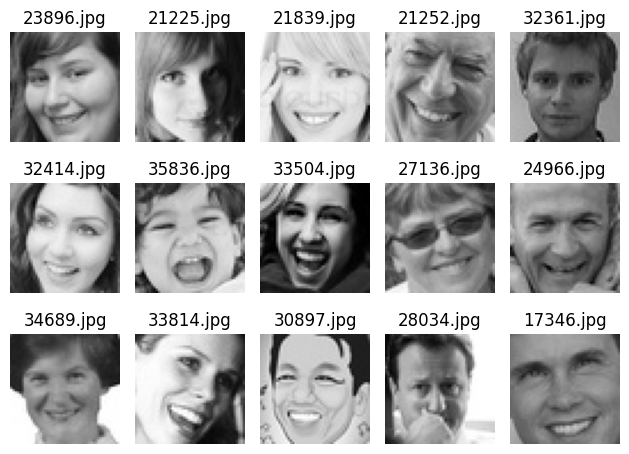

In [ ]:
# setting the happy images folder path
happy_path = '/content/data/Facial_emotion_images/train/happy'
happy_images = os.listdir(happy_path)[:15]

# Loop through the first 15 images and plot them
for i in range(1, 16, 1):
  path = os.path.join(happy_path, happy_images[i-1])
  img = tf.keras.utils.load_img(path)

  plt.subplot(3, 5, i)
  plt.imshow(img)
  plt.axis('off')
  plt.title(happy_images[i-1])

plt.tight_layout()
plt.show()

#### **Sad**

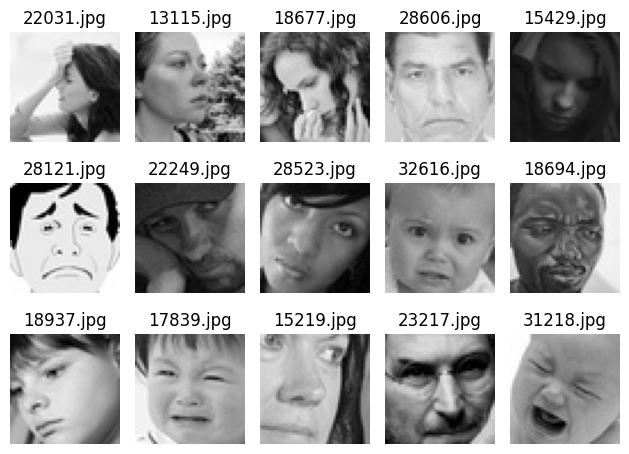

In [ ]:
# setting the sad images folder path
sad_path = '/content/data/Facial_emotion_images/train/sad'
sad_images = os.listdir(sad_path)[:15]

# Loop through the first 15 images and plot them
for i in range(1, 16, 1):
  path = os.path.join(sad_path, sad_images[i-1])
  img = tf.keras.utils.load_img(path)

  plt.subplot(3, 5, i)
  plt.imshow(img)
  plt.axis('off')
  plt.title(sad_images[i-1])

plt.tight_layout()
plt.show()

**Observations and Insights:**
1. Sad seems like a wider variation of features
2. People express sadness in many ways, reduced obvious features that happy images produce
3. Added complexixity of hand gestures in the sad preview images.

#### **Neutral**

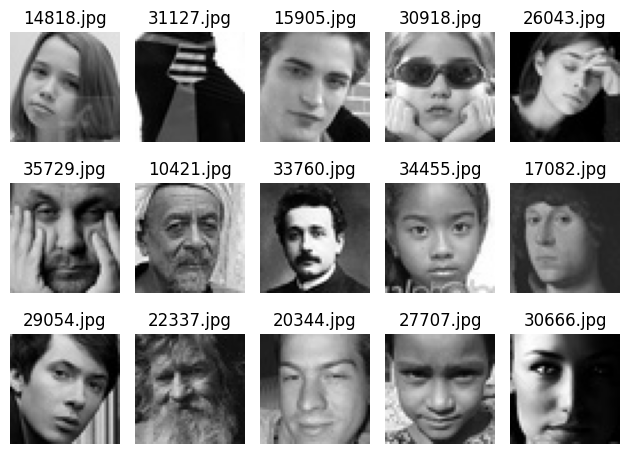

In [ ]:
# setting the neutral images folder path
neutral_path = '/content/data/Facial_emotion_images/train/neutral'
neutral_images = os.listdir(neutral_path)[:15]

# Loop through the first 15 images and plot them
for i in range(1, 16, 1):
  path = os.path.join(neutral_path, neutral_images[i-1])
  img = tf.keras.utils.load_img(path)

  plt.subplot(3, 5, i)
  plt.imshow(img)
  plt.axis('off')
  plt.title(neutral_images[i-1])

plt.tight_layout()
plt.show()

#### **Surprised**

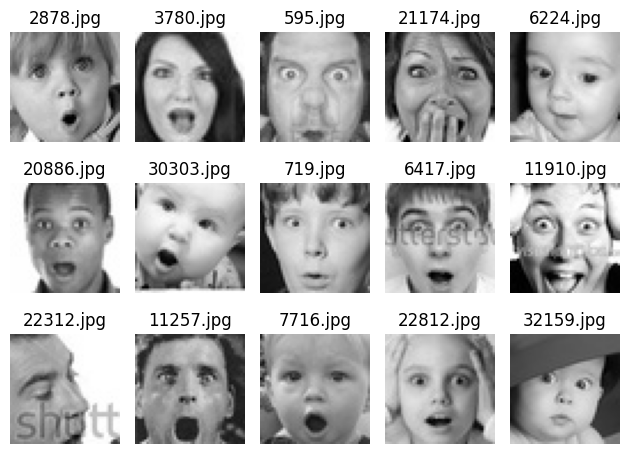

In [ ]:
# setting the surpise images folder path
surprised_path = '/content/data/Facial_emotion_images/train/surprise'
surprised_images = os.listdir(surprised_path)[:15]

# Loop through the first 15 images and plot them
for i in range(1, 16, 1):
  path = os.path.join(surprised_path, surprised_images[i-1])
  img = tf.keras.utils.load_img(path)

  plt.subplot(3, 5, i)
  plt.imshow(img)
  plt.axis('off')
  plt.title(surprised_images[i-1])

plt.tight_layout()
plt.show()

**Observations and Insights:**
1. Suprised images could be confused with other images.
2. See an array of common facial features that appear in less ambiguous categorical images. ie) teeth showing, hands on face,

#### **Checking Distribution of Classes**

In [ ]:
surprised_count = len(os.listdir(surprised_path))
happy_count = len(os.listdir(happy_path))
neutral_count = len(os.listdir(neutral_path))
sad_count = len(os.listdir(sad_path))

print(surprised_count, happy_count, neutral_count, sad_count)

3173 3976 3978 3982


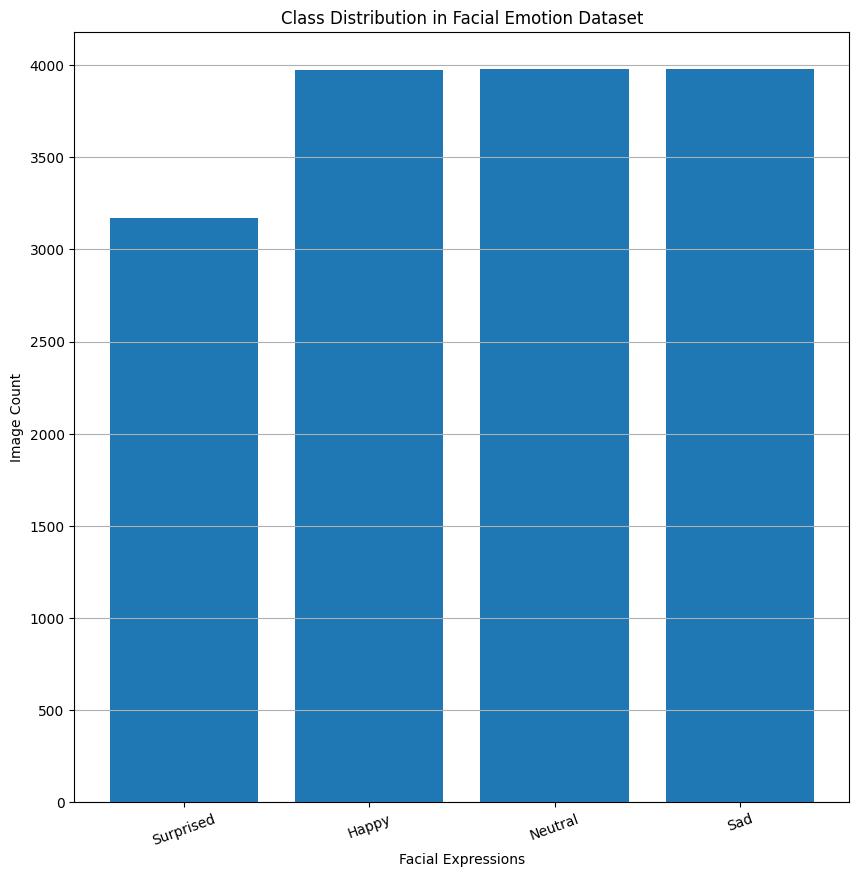

In [ ]:
# Class Count variables
class_counts = {
    'Surprised': surprised_count,
    'Happy': happy_count,
    'Neutral': neutral_count,
    'Sad': sad_count
}

# Plotting
plt.figure(figsize = (10, 10))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Facial Expressions')
plt.ylabel('Image Count')
plt.title('Class Distribution in Facial Emotion Dataset')
plt.xticks(rotation = 20)
plt.grid(axis = 'y')

# Show the plot
plt.show()

**Observations and Insights:__**

1. Suprised category represents only about 21% of the training images, while the others represent 25-26%.
2. We will need to evaluate during training if we need to come up with a solution to test the class imbalance.
3. A couple options we could explore in the models are class weighting. IE weight the suprised class less during training, or augmenting data to add variations of the images we already have to balance our populations out.

#### **Checking Pixel Images/Data Quality**

DataFrame head:
     set emotion   filename     distance
0  train     sad  32770.jpg  2289.128452
1  train     sad  31759.jpg  3311.082896
2  train     sad  35260.jpg  3172.193906
3  train     sad  33528.jpg  2745.762698
4  train     sad  23648.jpg  4858.447095


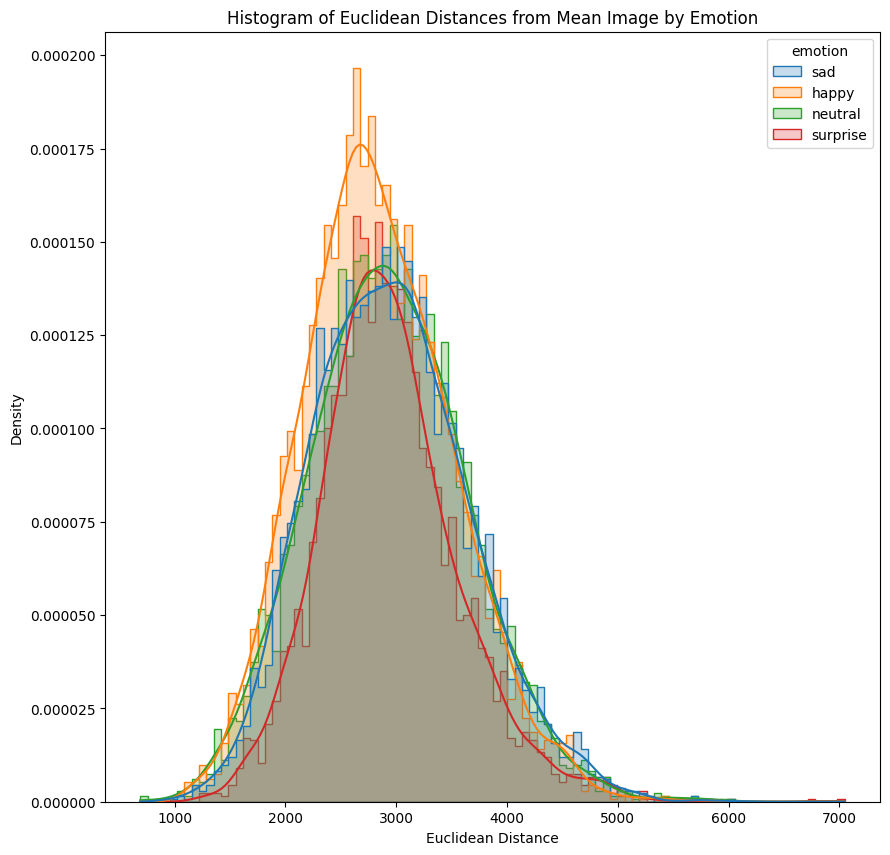

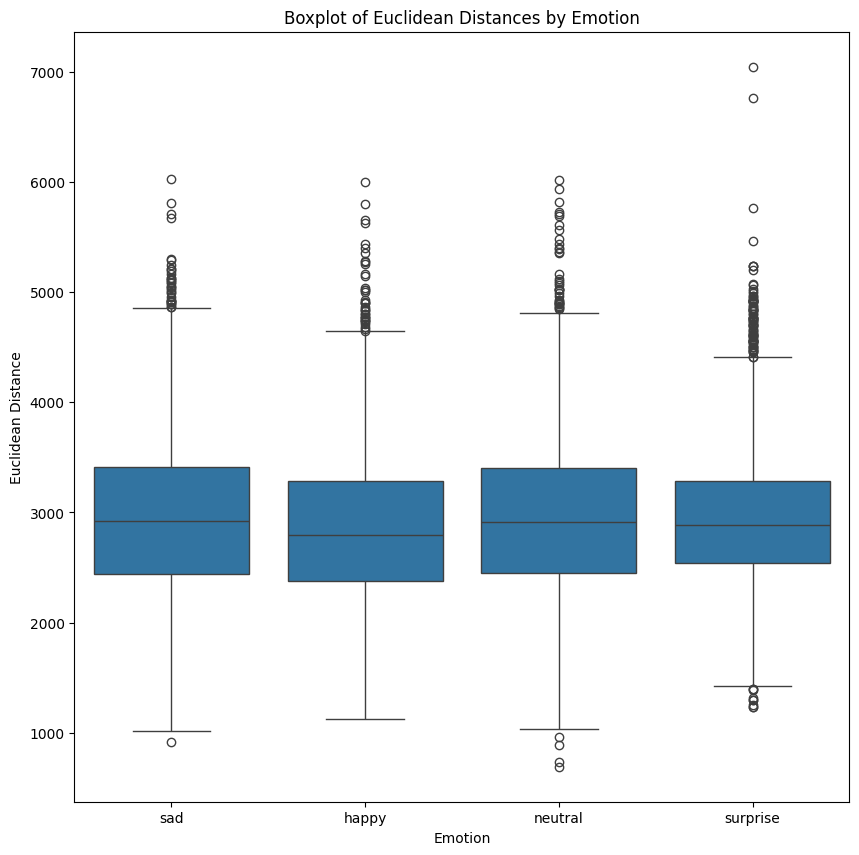

In [ ]:
# Define main directories and emotion subfolders
main_dirs = [
    '/content/data/Facial_emotion_images/train',
    '/content/data/Facial_emotion_images/test',
    '/content/data/Facial_emotion_images/validation'
]
emotions = ['sad', 'happy', 'neutral', 'surprise']

# List to store results for each image
data = []

# Iterate over each main directory and emotion subfolder
for main_dir in main_dirs:
    # Use the last part of the directory path as a label (e.g., 'train', 'test', 'validation')
    set_name = os.path.basename(main_dir)
    for emotion in emotions:
        folder_path = os.path.join(main_dir, emotion)
        if not os.path.exists(folder_path):
            print(f"Folder not found: {folder_path}")
            continue

        # Get list of jpg files
        image_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]
        images = []
        file_names = []

        # Process each image
        for file in image_files:
            img_path = os.path.join(folder_path, file)
            try:
                # Flatten into an array
                img = Image.open(img_path).convert('L')
                img = img.resize((48, 48))
                img_array = np.array(img).flatten()
                images.append(img_array)
                file_names.append(file)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

        if images:
            images = np.array(images)
            # Compute the mean image for the current emotion folder
            mean_image = np.mean(images, axis=0)
            # Compute Euclidean distances for each image from the mean image
            distances = [euclidean(img, mean_image) for img in images]
            # Save the results to our list
            for idx, file in enumerate(file_names):
                data.append({
                    'set': set_name,
                    'emotion': emotion,
                    'filename': file,
                    'distance': distances[idx]
                })
        else:
            print(f"No images found in {folder_path}")

# Create a DataFrame from the collected data
df = pd.DataFrame(data)
print("DataFrame head:")
print(df.head())

# Plot histogram of distances by emotion
plt.figure(figsize = (10, 10))
sns.histplot(data = df, x = 'distance', kde = True, element = 'step', stat="density", hue='emotion')
plt.title("Histogram of Euclidean Distances from Mean Image by Emotion")
plt.xlabel("Euclidean Distance")
plt.ylabel("Density")
plt.show()

# Plot boxplot of distances by emotion
plt.figure(figsize=(10, 10))
sns.boxplot(x = 'emotion', y = 'distance', data = df)
plt.title("Boxplot of Euclidean Distances by Emotion")
plt.xlabel("Emotion")
plt.ylabel("Euclidean Distance")
plt.show()


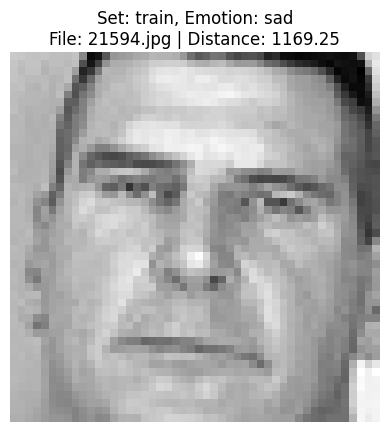

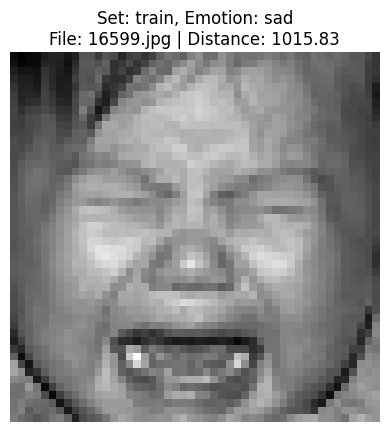

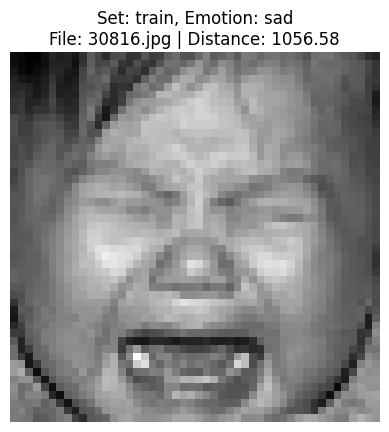

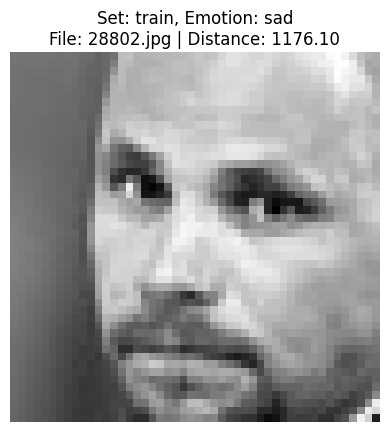

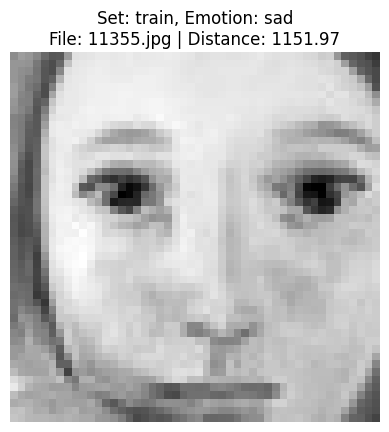

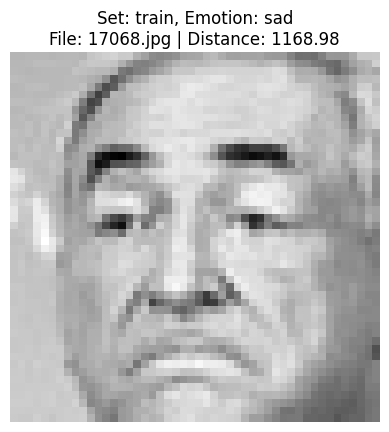

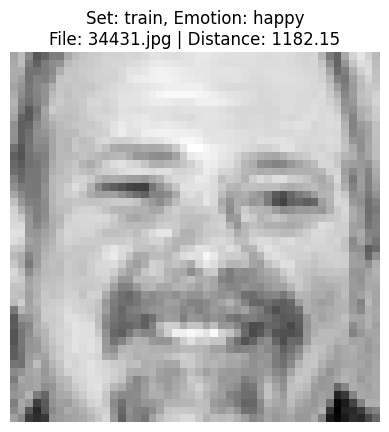

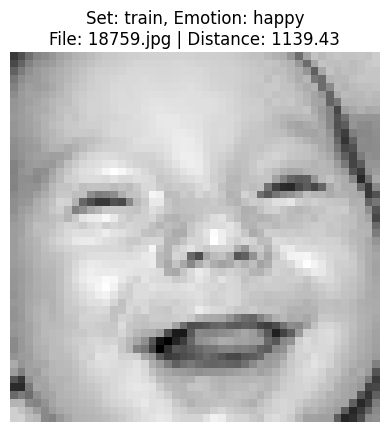

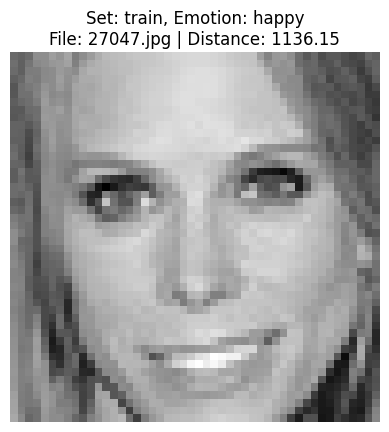

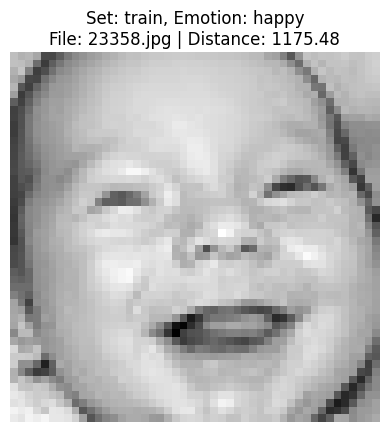

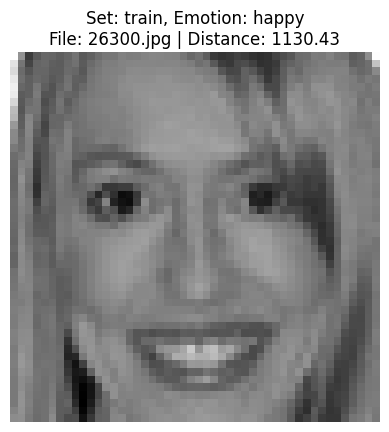

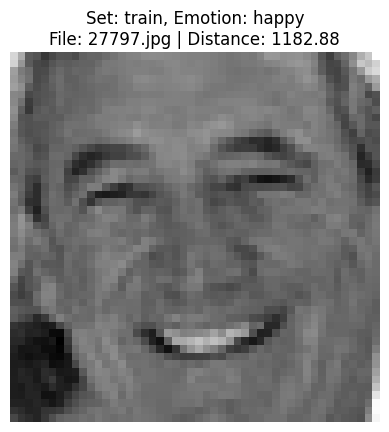

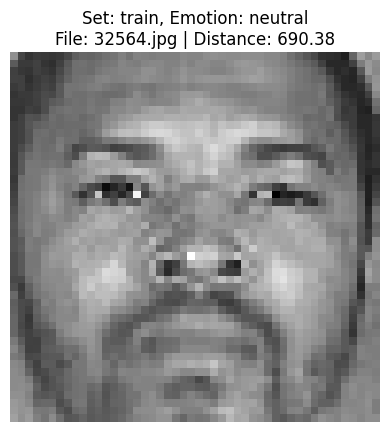

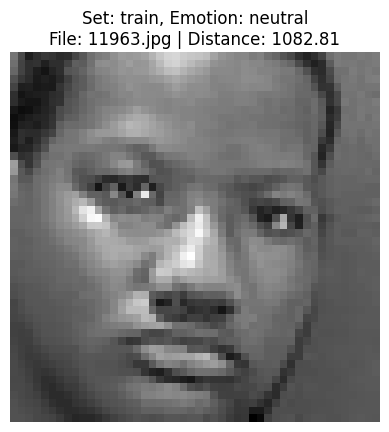

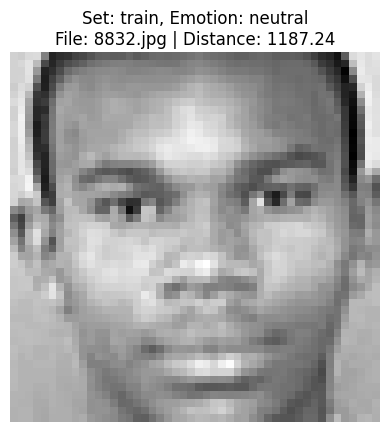

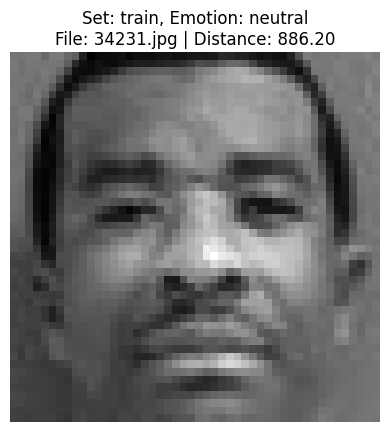

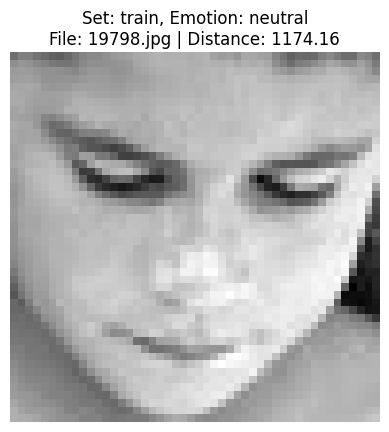

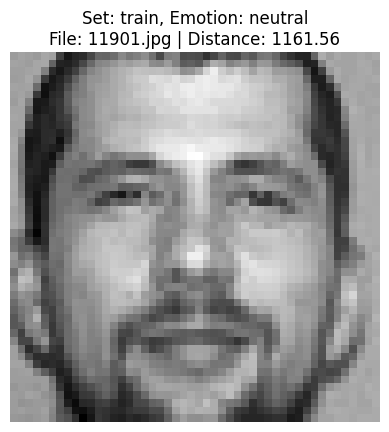

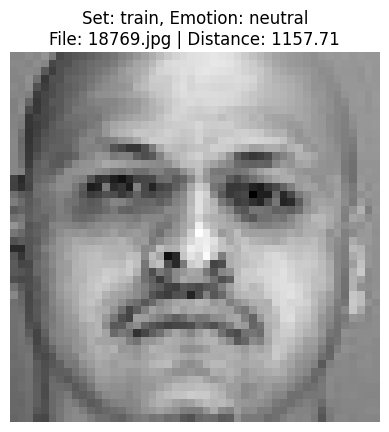

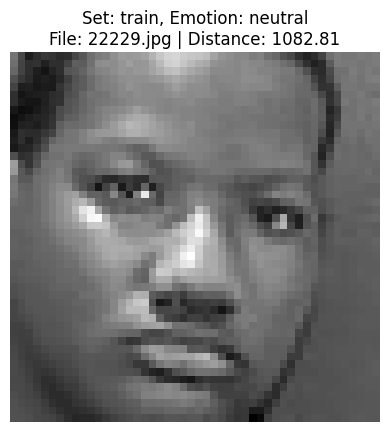

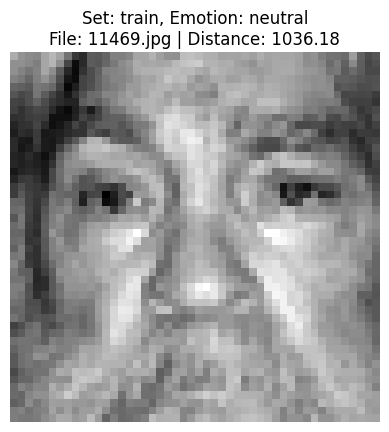

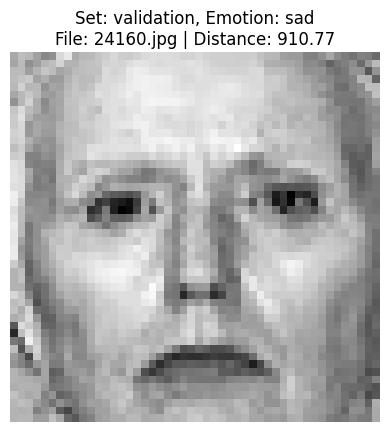

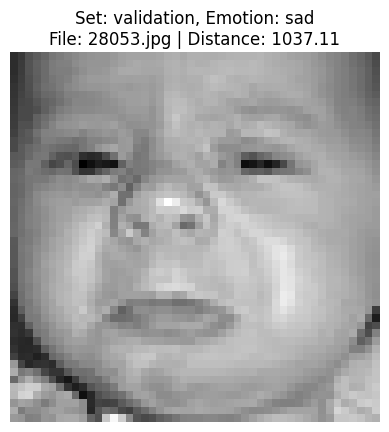

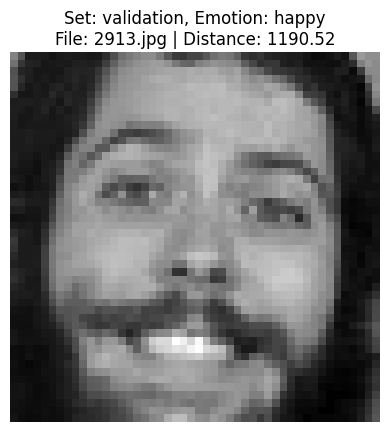

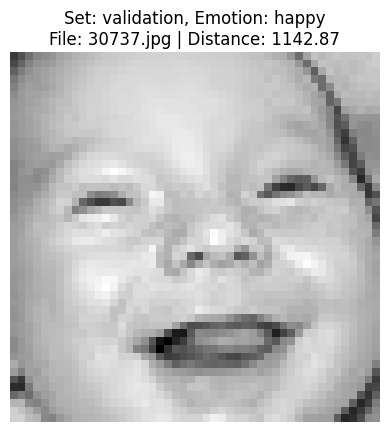

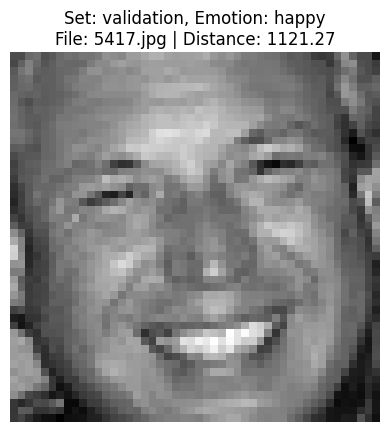

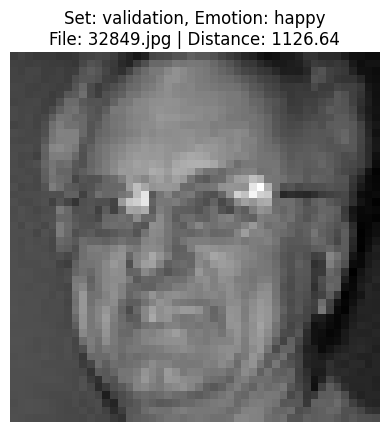

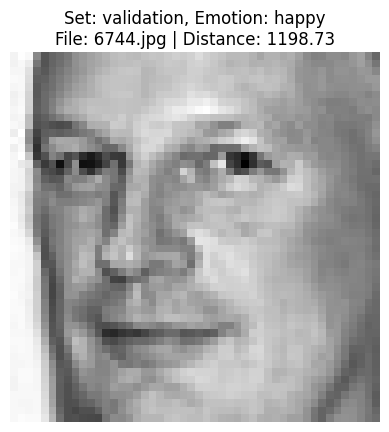

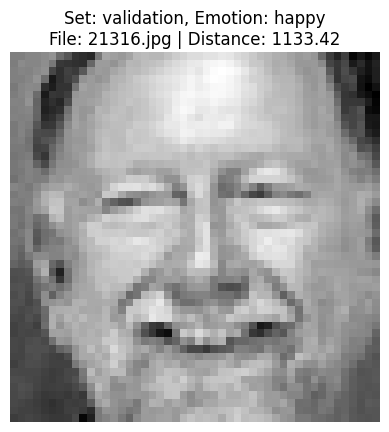

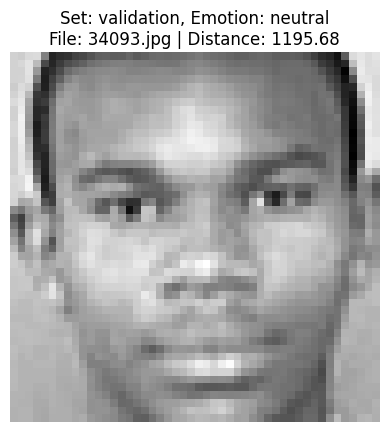

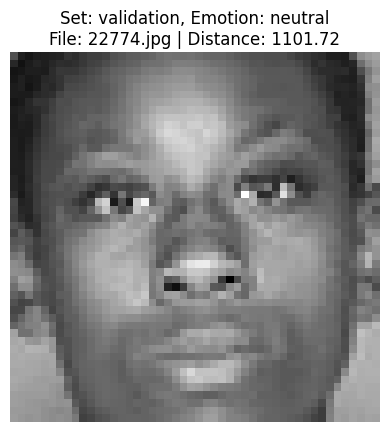

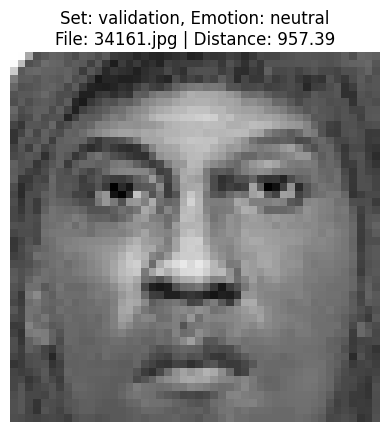

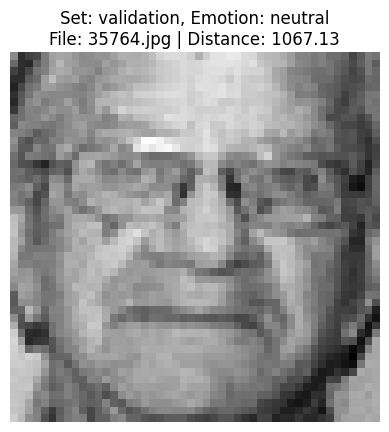

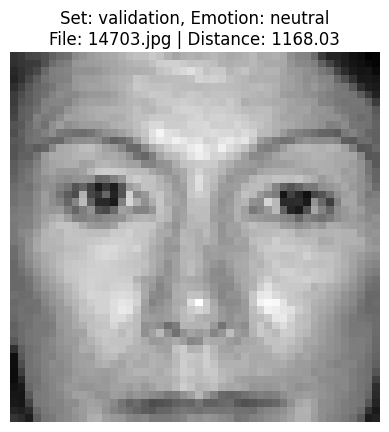

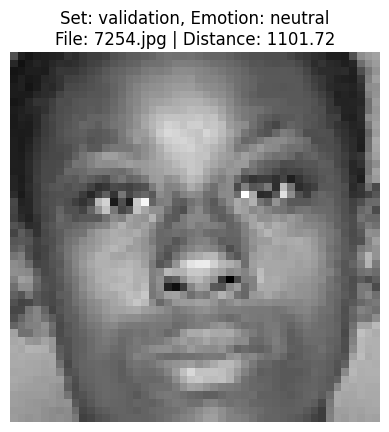

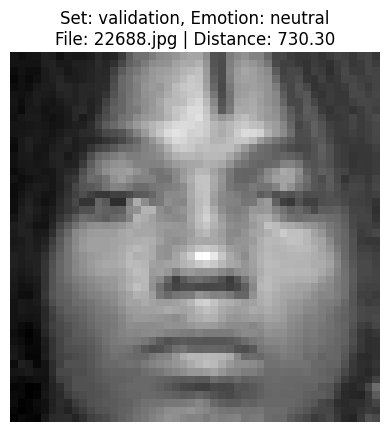

In [ ]:
# Base directory for the images (adjust if necessary)
base_dir = '/content/data/Facial_emotion_images'

# Filter the DataFrame for images with distance over 5500
bad_df = df[df['distance'] < 1200]

if bad_df.empty:
    print("No images with a distance greater than 5000 were found.")
else:
    for idx, row in bad_df.iterrows():
        # Construct the full path: base_dir / set / emotion / filename
        img_path = os.path.join(base_dir, row['set'], row['emotion'], row['filename'])
        try:
            img = Image.open(img_path).convert('L')
            img = img.resize((48, 48))
            plt.figure()
            plt.imshow(np.array(img), cmap='gray')
            plt.title(f"Set: {row['set']}, Emotion: {row['emotion']}\nFile: {row['filename']} | Distance: {row['distance']:.2f}")
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Error opening image {img_path}: {e}")

In [ ]:
# Base directory and destination folder
base_dir = '/content/data/Facial_emotion_images'
remove_dir = os.path.join(base_dir, 'remove')

# Create the remove directory if it doesn't exist
os.makedirs(remove_dir, exist_ok=True)

# hardcoded list of garbage images
bad_images = [
    ('train', 'sad', '30705'),
    ('train', 'sad', '23894'),
    ('train', 'sad', '35632'),
    ('train', 'happy', '16540'),
    ('train', 'happy', '29447'),
    ('train', 'happy', '24891'),
    ('train', 'happy', '26383'),
    ('train', 'neutral', '26897'),
    ('train', 'neutral', '25909'),
    ('train', 'neutral', '19632'),
    ('train', 'neutral', '15144'),
    ('train', 'neutral', '25219'),
    ('train', 'neutral', '11846'),
    ('train', 'neutral', '17081'),
    ('train', 'neutral', '31825'),
    ('train', 'neutral', '34334'),
    ('train', 'neutral', '22927'),
    ('train', 'neutral', '31127'),
    ('train', 'surprise', '19238'),
    ('train', 'surprise', '13988'),
    ('train', 'surprise', '2809'),
    ('test', 'happy', '15838'),
    ('validation', 'sad', '10423'),
    ('validation', 'neutral', '21817'),
    ('validation', 'surprise', '29557')
]

# Loop through the blacklist and move each file to the remove folder.
for dataset, emotion, img_id in bad_images:
    # Construct the source file path.
    src_path = os.path.join(base_dir, dataset, emotion, img_id + '.jpg')

    # Construct the destination directory and file path, preserving the dataset/emotion structure.
    dest_dir = os.path.join(remove_dir, dataset, emotion)
    dest_path = os.path.join(dest_dir, img_id + '.jpg')

    # Create the destination directory if it doesn't exist.
    os.makedirs(dest_dir, exist_ok=True)

    # Check if the source file exists before attempting to move it.
    if os.path.exists(src_path):
        try:
            shutil.move(src_path, dest_path)
            print(f"Moved: {src_path} ---> {dest_path}")
        except Exception as e:
            print(f"Error moving {src_path}: {e}")
    else:
        print(f"Source file does not exist: {src_path}")


Moved: /content/data/Facial_emotion_images/train/sad/30705.jpg ---> /content/data/Facial_emotion_images/remove/train/sad/30705.jpg
Moved: /content/data/Facial_emotion_images/train/sad/23894.jpg ---> /content/data/Facial_emotion_images/remove/train/sad/23894.jpg
Moved: /content/data/Facial_emotion_images/train/sad/35632.jpg ---> /content/data/Facial_emotion_images/remove/train/sad/35632.jpg
Moved: /content/data/Facial_emotion_images/train/happy/16540.jpg ---> /content/data/Facial_emotion_images/remove/train/happy/16540.jpg
Moved: /content/data/Facial_emotion_images/train/happy/29447.jpg ---> /content/data/Facial_emotion_images/remove/train/happy/29447.jpg
Moved: /content/data/Facial_emotion_images/train/happy/24891.jpg ---> /content/data/Facial_emotion_images/remove/train/happy/24891.jpg
Moved: /content/data/Facial_emotion_images/train/happy/26383.jpg ---> /content/data/Facial_emotion_images/remove/train/happy/26383.jpg
Moved: /content/data/Facial_emotion_images/train/neutral/26897.jpg 

**Observations and Insights:__**
1. Images with a distance > 5500 seem to have a higher chance to be of a garbage/bad data quality image.
2. The trend isnt consistent enough to dynamically build a function to remove these images programatically. Images were manually removed to improve training/validation/testing performance.
3. Operational guard rails will need to be put into place before the model is trained again in the future.

## Helper Functions

#### Data Loader

In [ ]:
# create a generic function that will take in parameters to convert for grayscale or rgb. Can be called for all training methods
def load_data(batch_size = 64, color_mode = 'grayscale'):

    # Image size
    image_size = (48, 48)

    # Dataset paths
    train_path = '/content/data/Facial_emotion_images/train'
    val_path = '/content/data/Facial_emotion_images/validation'
    test_path = '/content/data/Facial_emotion_images/test'

    # Augmentation for training
    train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 20,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = .15,
        zoom_range = .15,
        brightness_range = (0.8, 1.2),
        horizontal_flip = True
    )

    # Rescaling for validation and test data (no augmentation)
    val_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    # Load training data
    train_loader = train_datagen.flow_from_directory(
        directory = train_path,
        target_size = image_size,
        batch_size = batch_size,
        color_mode = color_mode,
        class_mode = 'categorical'
    )

    # Load validation data
    val_loader = val_datagen.flow_from_directory(
        directory = val_path,
        target_size = image_size,
        batch_size = batch_size,
        color_mode = color_mode,
        class_mode = 'categorical'
    )

    # Load test data
    test_loader = test_datagen.flow_from_directory(
        directory=test_path,
        target_size=image_size,
        batch_size=batch_size,
        color_mode=color_mode,
        class_mode='categorical',
        shuffle=False
    )

    input_shape = (48, 48, 1) if color_mode == 'grayscale' else (48, 48, 3)
    print(input_shape)

    # Print Class Labels
    class_indices = train_loader.class_indices
    print("Class Labels Mapping:", class_indices)

    return train_loader, val_loader, test_loader, class_indices, input_shape

### Custom Focal Loss

In [ ]:
import tensorflow.keras.backend as K

def categorical_focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)
        cross_entropy = -y_true * K.log(y_pred)
        modulating_factor = K.pow(1 - y_pred, gamma)
        loss = alpha * modulating_factor * cross_entropy
        return K.sum(loss, axis=1)

    return focal_loss


### Charts

##### Train Val

In [ ]:
# creating a model accuracy report that can be reused
def plot_model_accuracy(history):
    # Extract accuracy metrics
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(train_acc) + 1)

    # Create the plot
    plt.figure(figsize=(10, 10))
    plt.plot(epochs, train_acc, label = 'Training Accuracy', marker='o')
    plt.plot(epochs, val_acc, label = 'Validation Accuracy', marker='o')

    # Formatting the plot
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Confusion Matrix and Classifcation Report

In [ ]:
#efining the classification and confusion matrix that will be called for each model
def evaluate_model(model, test_loader):

    # Get predictions
    matrix_predictions = model.predict(test_loader)

    # Get predicted classifications
    preds = np.argmax(matrix_predictions, axis=1)

    # Get actual classifications
    actuals = test_loader.classes

    # Get class labels
    class_labels = list(test_loader.class_indices.keys())

    # Print classification report
    print("Classification Report:\n", classification_report(actuals, preds, target_names = class_labels))

    # Generate confusion matrix
    cm = confusion_matrix(actuals, preds)

    # Plot confusion matrix
    plt.figure(figsize = (10, 10))
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_labels, yticklabels = class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

#### Predicted Test Labels

In [ ]:
# generic function that will be called for all test predictions
def show_test_predictions(model, test_loader, num_images=10):
    # Get test images and labels from the generator
    test_images, test_labels = next(test_loader)

    # Get random indices for test images
    random_indices = np.random.choice(len(test_images), num_images, replace=False)

    # Get model predictions
    predictions = model.predict(test_images)

    # Get class names
    class_names = list(test_loader.class_indices.keys())

    # Plot test images with predictions
    plt.figure(figsize=(10, 10))

    for i, idx in enumerate(random_indices):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(test_images[idx], cmap = 'gray' if test_images.shape[-1] == 1 else None)
        predicted_label = class_names[np.argmax(predictions[idx])]
        actual_label = class_names[np.argmax(test_labels[idx])]
        plt.title(f'Predicted: {predicted_label}\nActual: {actual_label}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Final CNN Model

In [ ]:
# calling the data loader
train_loader, val_loader, test_loader, class_indices, input_shape = load_data(64, 'grayscale')

Found 15088 images belonging to 4 classes.
Found 4974 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
(48, 48, 1)
Class Labels Mapping: {'happy': 0, 'neutral': 1, 'sad': 2, 'surprise': 3}


In [ ]:
# Build CNN Model
advanced_cnn = Sequential([

    # creating the first conv layer
    Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
    BatchNormalization(),
    LeakyReLU(alpha = .01),
    MaxPooling2D(pool_size = 2),
    Dropout(0.15),

    # second layer
    Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
    BatchNormalization(),
    LeakyReLU(alpha = .01),
    MaxPooling2D(pool_size = 2),
    Dropout(0.15),

    # third conv
    Conv2D(128, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
    BatchNormalization(),
    LeakyReLU(alpha = .01),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),

    # additional layer of 256 to add some more feature attention, sticking with LeakyRelU
    Conv2D(256, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
    BatchNormalization(),
    LeakyReLU(alpha = .01),
    Dropout(0.2),

    # additional layer of 256 to add some more feature attention, sticking with LeakyRelU
    Conv2D(512, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
    BatchNormalization(),
    LeakyReLU(alpha = .01),
    Dropout(0.3),

    GlobalAveragePooling2D(),

    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dropout(0.3),

    Dense(4, activation = 'softmax')  # 4 emotion classes
])

advanced_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,900,804 (7.25 MB)

 Trainable params: 1,898,820 (7.24 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
# clearing the session
clear_session()

#compiling the model with a call to our categorical focal loss
advanced_cnn.compile(
    loss = categorical_focal_loss(gamma=2.0, alpha=0.25),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy'])

In [ ]:
# Train Model
epochs = 40

# Early Stopping after n epochs
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 7, restore_best_weights = True)

# Reduce Learning Rate by n epochs in half
lr_scheduler = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, factor = 0.5, min_lr = 1e-6)

# Train the model with these callbacks
advanced_history = advanced_cnn.fit(
    train_loader,
    validation_data=val_loader,
    epochs = epochs,
    callbacks = [early_stopping, lr_scheduler])

Epoch 1/40
236/236 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.2818 - loss: 0.2039 - val_accuracy: 0.2443 - val_loss: 0.1931 - learning_rate: 0.0010
Epoch 2/40
236/236 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.3440 - loss: 0.1804 - val_accuracy: 0.3916 - val_loss: 0.1806 - learning_rate: 0.0010
Epoch 3/40
236/236 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.4144 - loss: 0.1612 - val_accuracy: 0.3506 - val_loss: 0.1675 - learning_rate: 0.0010
Epoch 4/40
236/236 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.4733 - loss: 0.1490 - val_accuracy: 0.4562 - val_loss: 0.2129 - learning_rate: 0.0010
Epoch 5/40
236/236 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.5313 - loss: 0.1371 - val_accuracy: 0.6146 - val_loss: 0.1139 - learning_rate: 0.0010
Epoch 6/40
236/236 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.5705 - loss: 0.1248 - val_accuracy: 0.5774 - val_loss: 0.1174 - learning_rate: 0.0010
Epoch 7/40
236/236 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.6005 - 

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


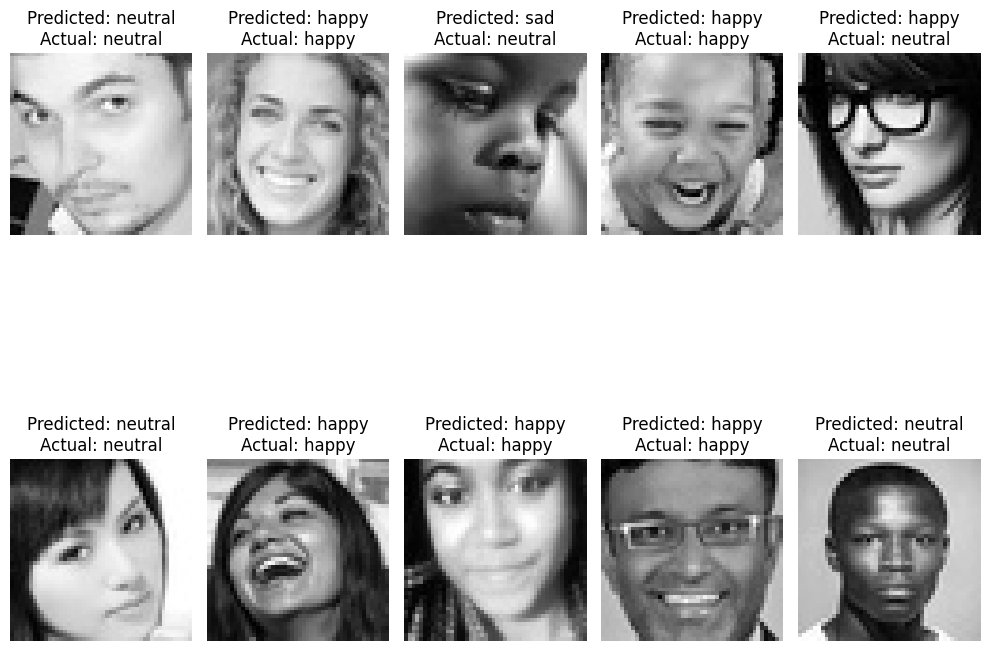

In [ ]:
# check test predictions (model, test loader image number)
show_test_predictions(advanced_cnn, test_loader, 10)

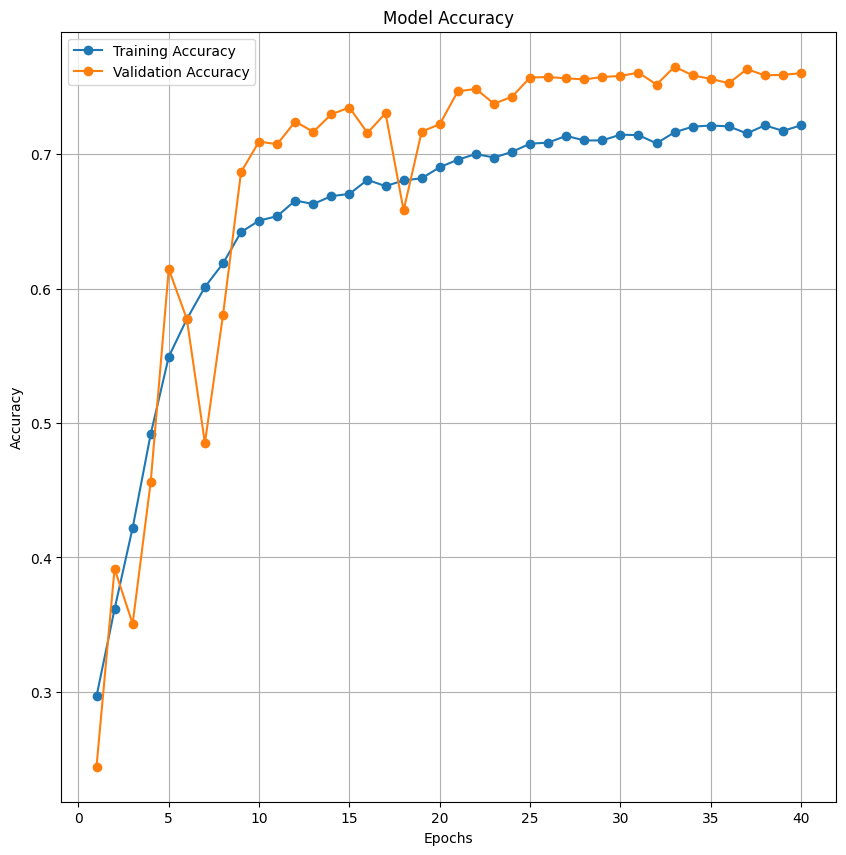

In [ ]:
# plot the train and val accuracy
plot_model_accuracy(advanced_history)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step
Classification Report:
               precision    recall  f1-score   support

       happy       0.94      0.94      0.94        31
     neutral       0.66      0.78      0.71        32
         sad       0.70      0.59      0.64        32
    surprise       0.94      0.91      0.92        32

    accuracy                           0.80       127
   macro avg       0.81      0.80      0.80       127
weighted avg       0.81      0.80      0.80       127



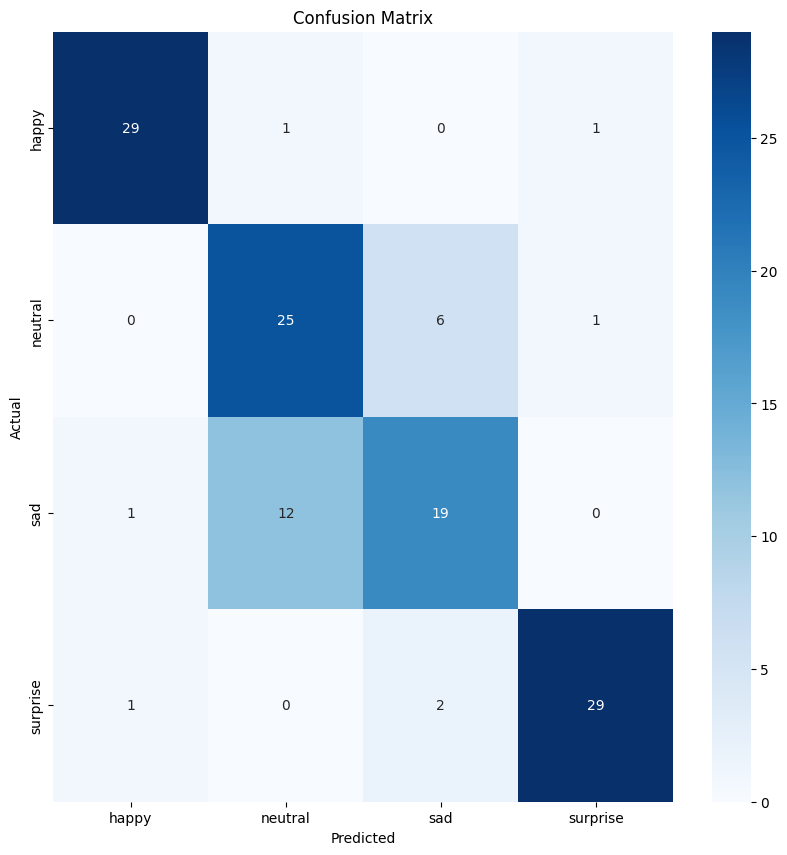

In [ ]:
# print the classification report and confusion matrix
evaluate_model(advanced_cnn, test_loader)

# Previous Model Analysis and Evaluation

## All code listed below is from analysis prior to final working model.

### Base Neural Network

In [ ]:
# clear any previous sessions
clear_session()

#load the data for the correct image channel
train_loader, val_loader, test_loader, class_indices, input_shape = load_data(64, 'grayscale')

Found 15088 images belonging to 4 classes.
Found 4974 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
(48, 48, 1)
Class Labels Mapping: {'happy': 0, 'neutral': 1, 'sad': 2, 'surprise': 3}


In [ ]:
color_mode = 'grayscale'  # 'rgb'
input_shape = (48, 48, 1) if color_mode == 'grayscale' else (48, 48, 3)

# Build CNN Model
model = Sequential([

    # creating the first conv layer
    Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
    BatchNormalization(),
    LeakyReLU(alpha = .01),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),

    # second layer
    Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
    BatchNormalization(),
    LeakyReLU(alpha = .01),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),

    # third conv
    Conv2D(128, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
    BatchNormalization(),
    LeakyReLU(alpha = .01),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),

    Flatten(),

    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dropout(0.3),

    Dense(4, activation = 'softmax')  # 4 emotion classes
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │              

 Total params: 2,519,556 (9.61 MB)

 Trainable params: 2,519,108 (9.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Compile Model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

# Train Model
epochs = 20

# Early Stopping after 5 epochs
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

# Reduce Learning Rate for 3 epochs
lr_scheduler = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, factor = 0.5, min_lr = 1e-6)

# Train the model with these callbacks
history = model.fit(
    train_loader,
    validation_data=val_loader,
    epochs = epochs,
    callbacks = [early_stopping, lr_scheduler]
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


236/236 ━━━━━━━━━━━━━━━━━━━━ 40s 99ms/step - accuracy: 0.2587 - loss: 2.3322 - val_accuracy: 0.2304 - val_loss: 1.3745 - learning_rate: 0.0010
Epoch 2/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.2791 - loss: 1.3971 - val_accuracy: 0.2919 - val_loss: 1.3700 - learning_rate: 0.0010
Epoch 3/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.2875 - loss: 1.3727 - val_accuracy: 0.3448 - val_loss: 1.3434 - learning_rate: 0.0010
Epoch 4/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.2937 - loss: 1.3627 - val_accuracy: 0.3693 - val_loss: 1.3309 - learning_rate: 0.0010
Epoch 5/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.3116 - loss: 1.3520 - val_accuracy: 0.3460 - val_loss: 1.2792 - learning_rate: 0.0010
Epoch 6/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.3339 - loss: 1.3369 - val_accuracy: 0.3918 - val_loss: 1.2911 - learning_rate: 0.0010
Epoch 7/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.3435 - loss: 1.3033

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step 


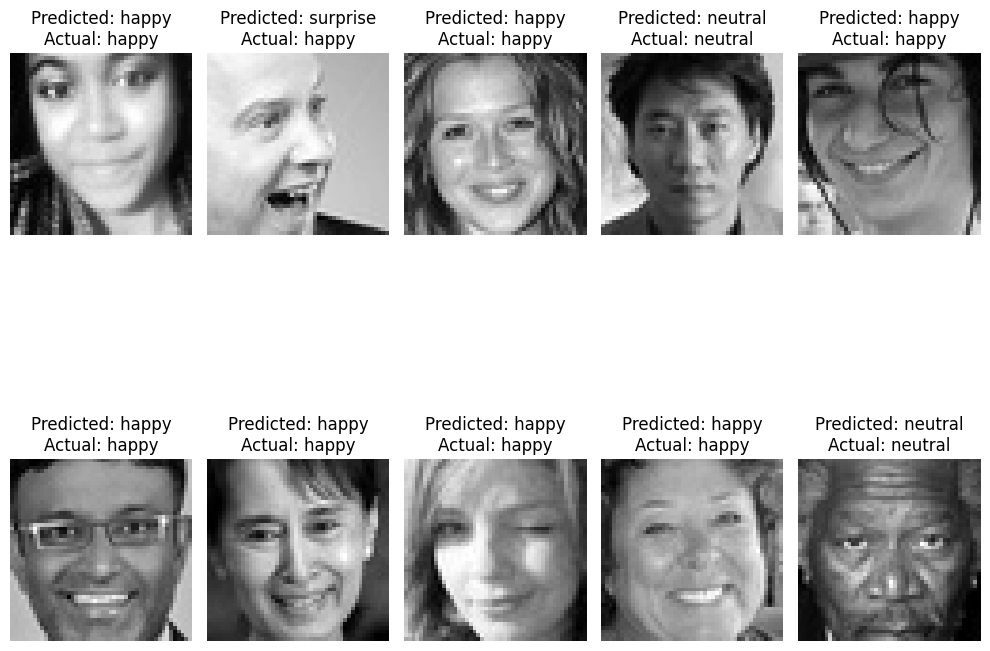

In [ ]:
# check test predictions (model, test loader image number)
show_test_predictions(model, test_loader, 10)

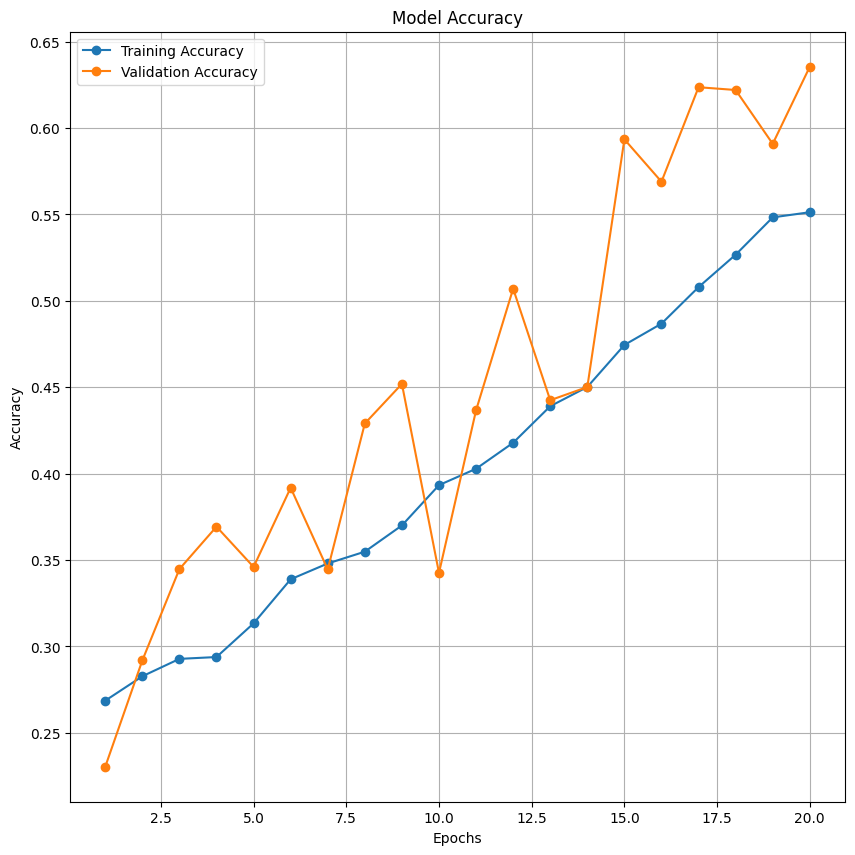

In [ ]:
# plot the train and val accuracy
plot_model_accuracy(history)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step
Classification Report:
               precision    recall  f1-score   support

       happy       0.53      0.90      0.67        31
     neutral       0.53      0.56      0.55        32
         sad       0.60      0.28      0.38        32
    surprise       0.96      0.75      0.84        32

    accuracy                           0.62       127
   macro avg       0.65      0.62      0.61       127
weighted avg       0.66      0.62      0.61       127



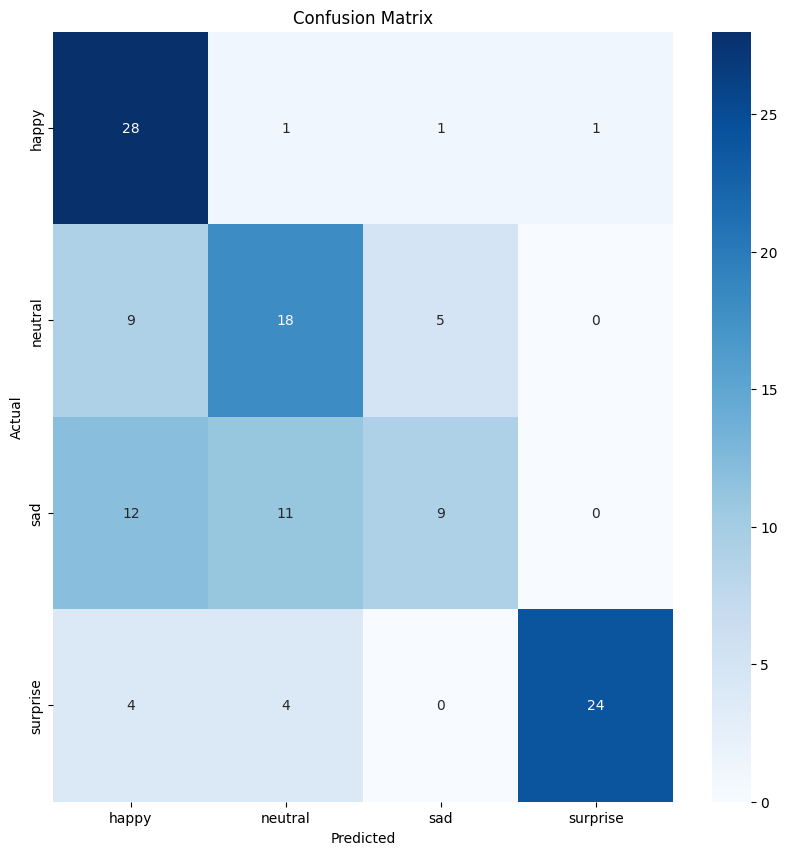

In [ ]:
# print the classification report and confusion matrix
evaluate_model(model, test_loader)

**Observations and Insights:__**
1. The smaller CNN models seemed OK but not sufficient for what we are looking for in terms of accuracy/confidence.  

  -- 10 epochs seemed too small for even initial model training, minimum 20, started to see marginal gains, future models may benefit from bigger epochs

  -- adding leaky Relu seemed to increase accuracy results.  

2. As expected, in the confusion matrix we can see that the ambiguity of sad/neutral seem to be causing misclassifications.

3. Will need to add another deeper layer to potentially catch some of the nuanced features in the neutral/sad

4. Final models potentially consider changing the kernel size to see if we can capture different features in the data set.  

5. I have not adjusted the data yet for the class imbalance will look into that further as we have better model results.

### Second Convolutional Neural Network

In [ ]:
# clear any previous sessions
clear_session()

#load the data for the correct image channel
train_loader, val_loader, test_loader, class_indices, input_shape = load_data(64, 'grayscale')

Found 15088 images belonging to 4 classes.
Found 4974 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
(48, 48, 1)
Class Labels Mapping: {'happy': 0, 'neutral': 1, 'sad': 2, 'surprise': 3}


In [ ]:
color_mode = 'grayscale'  # 'rgb'
input_shape = (48, 48, 1) if color_mode == 'grayscale' else (48, 48, 3)

# Build CNN Model
model_2 = Sequential([

    # creating the first conv layer
    Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
    BatchNormalization(),
    LeakyReLU(alpha = .01),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),

    # second layer
    Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
    BatchNormalization(),
    LeakyReLU(alpha = .01),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),

    # third conv
    Conv2D(128, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
    BatchNormalization(),
    LeakyReLU(alpha = .01),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),

    # additional layer of 256 to add some more feature attention, sticking with LeakyRelU
    Conv2D(256, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
    BatchNormalization(),
    LeakyReLU(alpha = .01),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),

    Flatten(),

    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dropout(0.3),

    Dense(4, activation = 'softmax')  # 4 emotion classes
])

model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,636,100 (6.24 MB)

 Trainable params: 1,635,140 (6.24 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# Compile Model
model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

# Train Model
epochs = 20

# Early Stopping after 5 epochs
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

# Reduce Learning Rate for 3 epochs
lr_scheduler = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, factor = 0.5, min_lr = 1e-6)

# Train the model with these callbacks
history_2 = model_2.fit(
    train_loader,
    validation_data=val_loader,
    epochs = epochs,
    callbacks = [early_stopping, lr_scheduler])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 35s 102ms/step - accuracy: 0.2783 - loss: 1.8681 - val_accuracy: 0.2441 - val_loss: 1.3793 - learning_rate: 0.0010
Epoch 2/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.2821 - loss: 1.3822 - val_accuracy: 0.3599 - val_loss: 1.3662 - learning_rate: 0.0010
Epoch 3/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.2902 - loss: 1.3699 - val_accuracy: 0.3685 - val_loss: 1.3359 - learning_rate: 0.0010
Epoch 4/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.2949 - loss: 1.3644 - val_accuracy: 0.4015 - val_loss: 1.3258 - learning_rate: 0.0010
Epoch 5/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.3335 - loss: 1.3414 - val_accuracy: 0.3466 - val_loss: 1.3005 - learning_rate: 0.0010
Epoch 6/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.3598 - loss: 1.2886 - val_accuracy: 0.3625 - val_loss: 1.2129 - learning_rate: 0.0010
Epoch 7/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.3893 - 

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step 


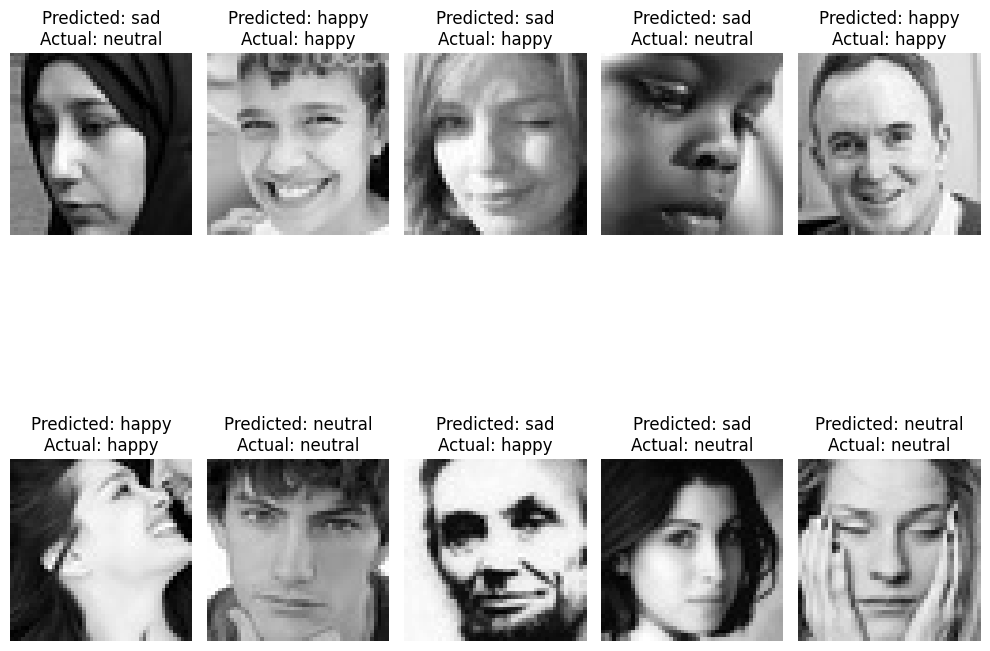

In [ ]:
# check test predictions (model, test loader image number)
show_test_predictions(model_2, test_loader, 10)

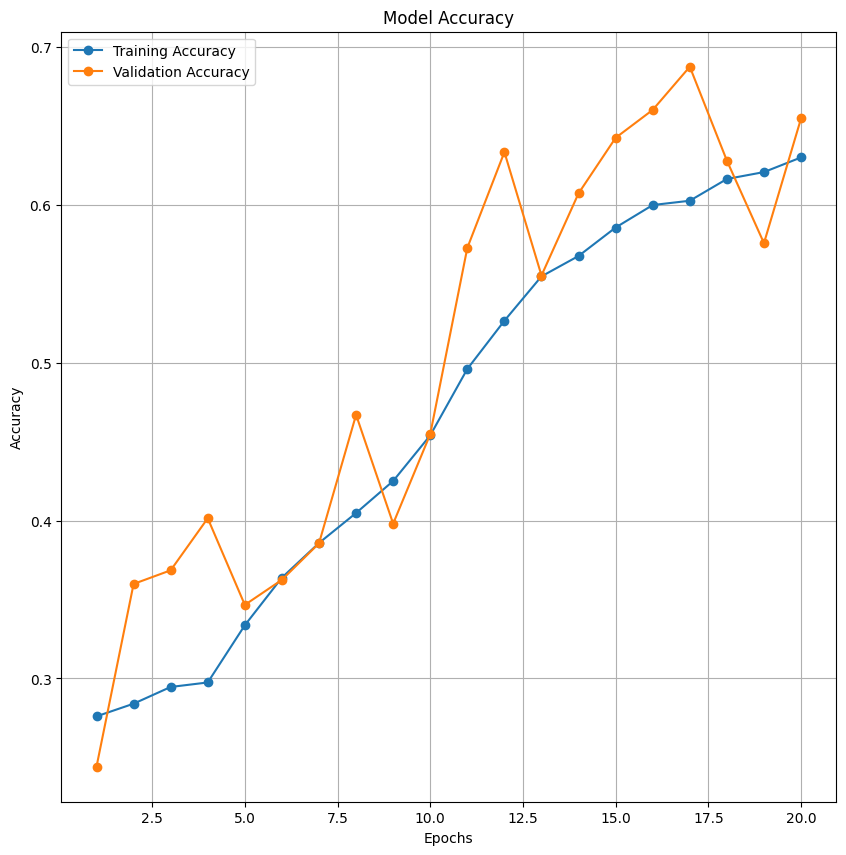

In [ ]:
# plot the train and val accuracy
plot_model_accuracy(history_2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Classification Report:
               precision    recall  f1-score   support

       happy       0.83      0.77      0.80        31
     neutral       0.49      0.66      0.56        32
         sad       0.47      0.47      0.47        32
    surprise       1.00      0.72      0.84        32

    accuracy                           0.65       127
   macro avg       0.70      0.65      0.67       127
weighted avg       0.70      0.65      0.67       127



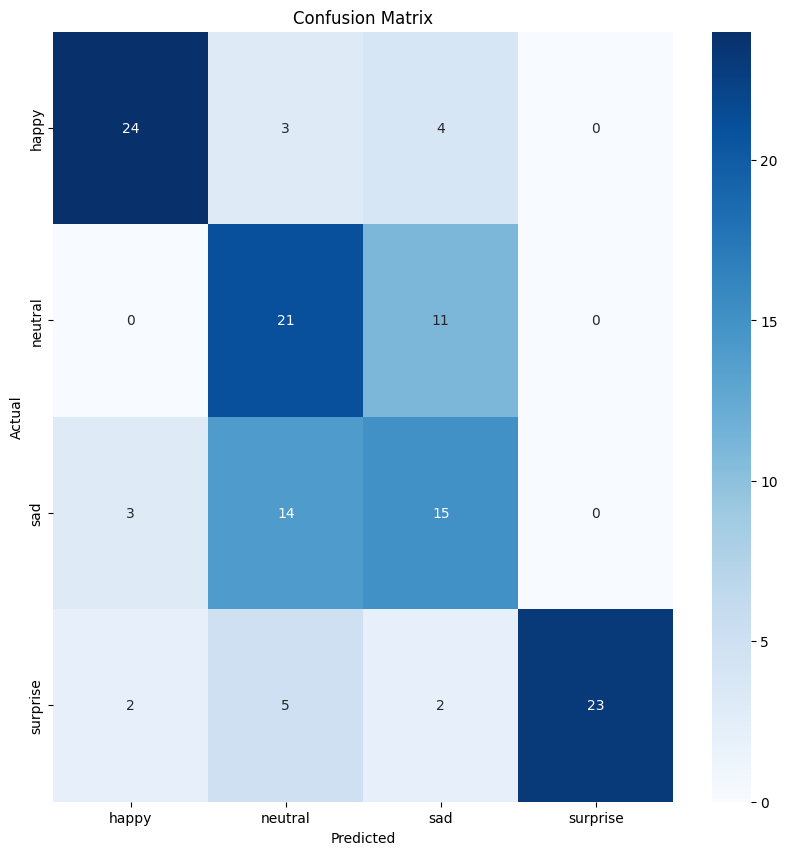

In [ ]:
# print the classification report and confusion matrix
evaluate_model(model_2, test_loader)

**Observations and Insights:**

1. The additional of hidden layers resulted in an increase in performance overall to around 72.
2. While not exactly what we are looking for a step in the right direction.
3. Training accuracy is not consistently increasing.
4. The validation loss is still decreasing, the model is not overfitting yet. There is potential to see how training accuracy and validation loss trending with adding 5-10 + epochs
5. The RGB did not make any meaningful gains. Becasue the pictures are already grayscale, adding the rgb does not have an impact. We will need to consider this as we expand into looking at Transfer Learning Architectures where the channel is required.
6. So far this is the most promising model of the two, but will explore more after testing some transfer learning architectures.

### Transfer Learning Architectures

#### VGG16

In [ ]:
vgg = VGG16(weights = 'imagenet', include_top = False, input_shape = (48, 48, 3), pooling = 'max')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# call helper functions to load data
clear_session()

# modifying data loader to return updated channel for transfer learning cnns
train_loader, val_loader, test_loader, class_indices, input_shape = load_data(64, 'rgb')

Found 15088 images belonging to 4 classes.
Found 4974 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
(48, 48, 3)
Class Labels Mapping: {'happy': 0, 'neutral': 1, 'sad': 2, 'surprise': 3}


In [ ]:
# setting training layers = false.
for layer in vgg.layers:
  layer.trainable = False

pre_vgg_layers = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48, 48, 3)), #hard coded channel
    BatchNormalization(),
    MaxPooling2D(pool_size=2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),
])

vgg_model = Sequential([
    vgg,
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

vgg_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,043,524 (57.39 MB)

 Trainable params: 328,836 (1.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Compile the model
vgg_model.compile(
    optimizer = Adam(learning_rate = 0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
# Train Model
epochs = 20

# Early Stopping after 5 epochs
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

# Reduce Learning Rate for 3 epochs
lr_scheduler = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, factor = 0.5, min_lr = 1e-6)

# Train the model with these callbacks
vgg_history = vgg_model.fit(
    train_loader,
    validation_data = val_loader,
    epochs = epochs,
    callbacks = [early_stopping, lr_scheduler] )

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


236/236 ━━━━━━━━━━━━━━━━━━━━ 35s 125ms/step - accuracy: 0.2783 - loss: 1.4835 - val_accuracy: 0.4347 - val_loss: 1.2590 - learning_rate: 1.0000e-04
Epoch 2/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.3719 - loss: 1.3108 - val_accuracy: 0.4644 - val_loss: 1.2084 - learning_rate: 1.0000e-04
Epoch 3/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.4050 - loss: 1.2629 - val_accuracy: 0.4747 - val_loss: 1.1924 - learning_rate: 1.0000e-04
Epoch 4/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.4143 - loss: 1.2468 - val_accuracy: 0.4853 - val_loss: 1.1684 - learning_rate: 1.0000e-04
Epoch 5/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 42s 104ms/step - accuracy: 0.4241 - loss: 1.2408 - val_accuracy: 0.4751 - val_loss: 1.1741 - learning_rate: 1.0000e-04
Epoch 6/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.4290 - loss: 1.2408 - val_accuracy: 0.4938 - val_loss: 1.1509 - learning_rate: 1.0000e-04
Epoch 7/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - a

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


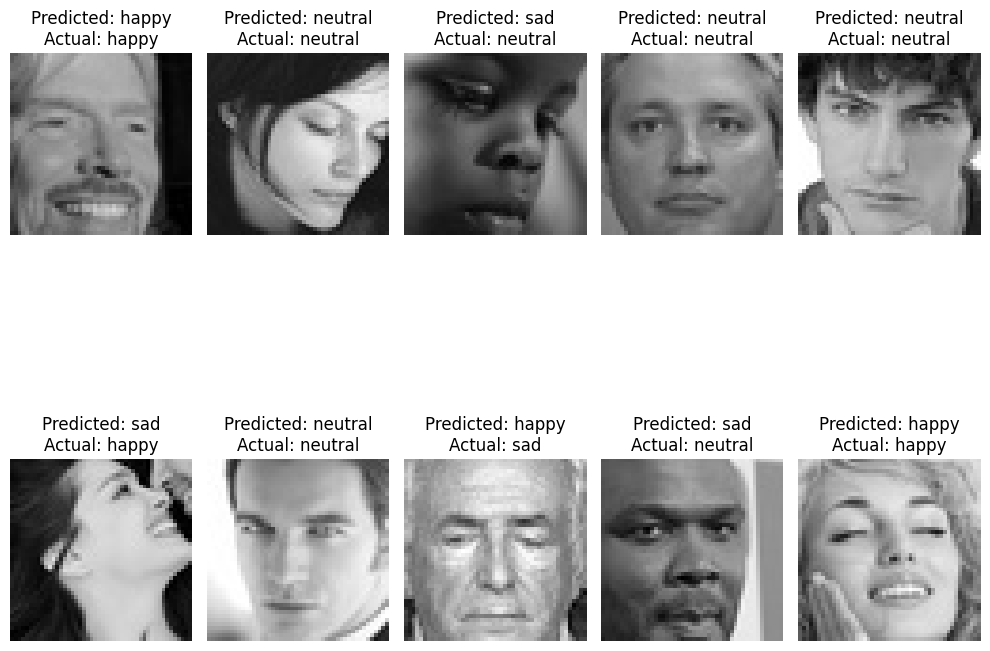

In [ ]:
# check test predictions (model, test loader image number)
show_test_predictions(vgg_model, test_loader, 10)

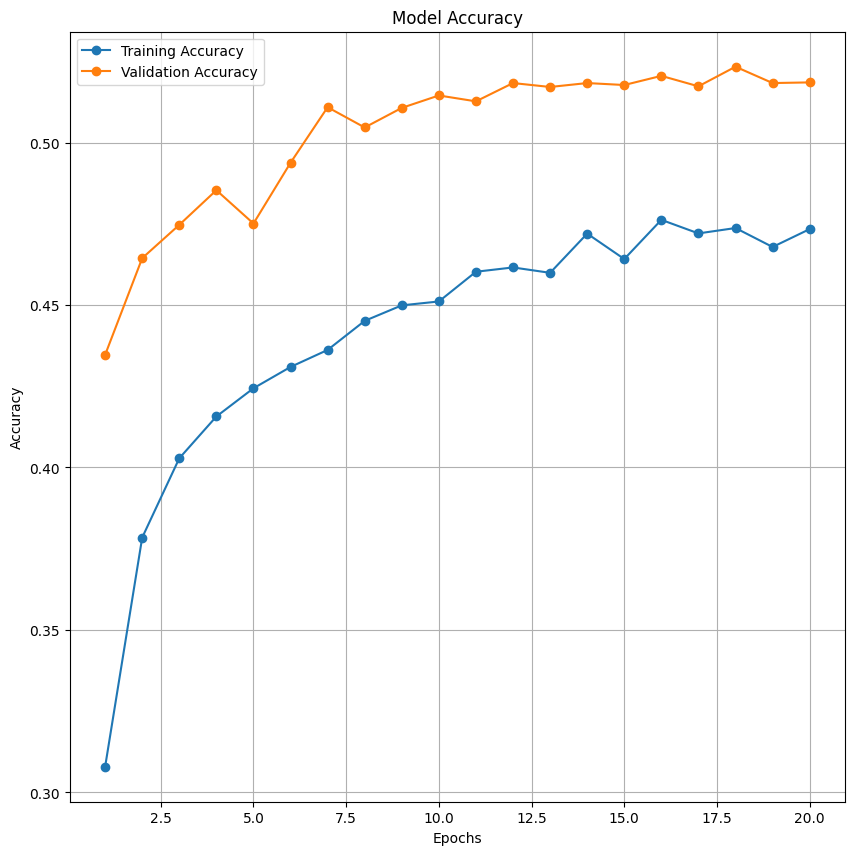

In [ ]:
# plot the train and val accuracy
plot_model_accuracy(vgg_history)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
Classification Report:
               precision    recall  f1-score   support

       happy       0.49      0.68      0.57        31
     neutral       0.36      0.38      0.37        32
         sad       0.60      0.38      0.46        32
    surprise       0.68      0.66      0.67        32

    accuracy                           0.52       127
   macro avg       0.53      0.52      0.52       127
weighted avg       0.53      0.52      0.52       127



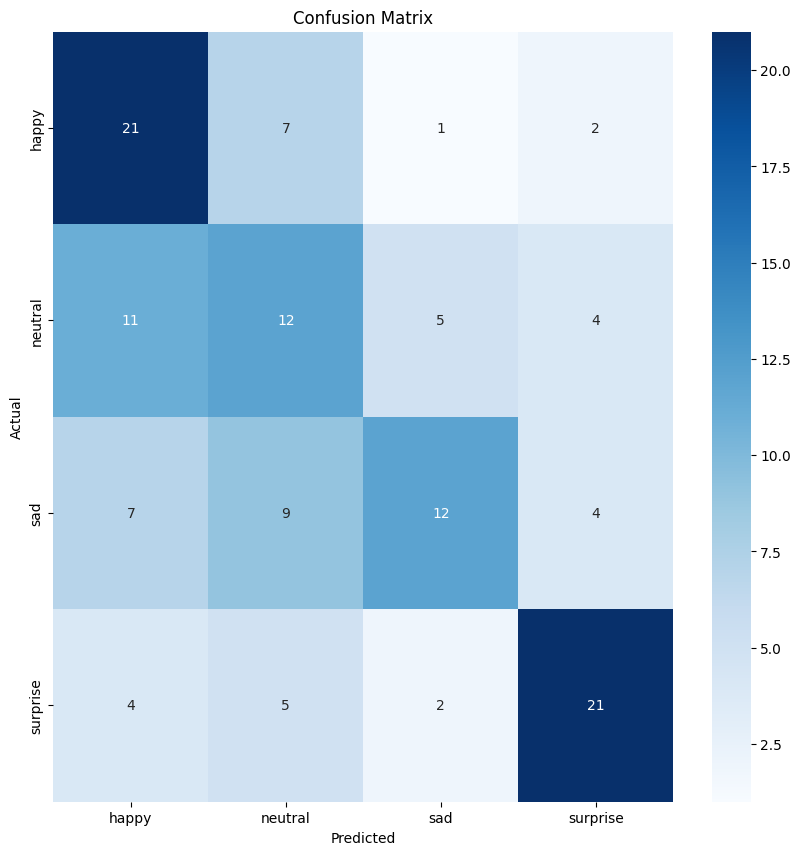

In [ ]:
# print the classification report and confusion matrix
evaluate_model(vgg_model, test_loader)

**Observations and Insights:__**
1. Even with the additional customer layers on top of VGG, the score increased but not enough to choose this model over the CNN.
2. The training and valdiation accuracies plateaued, indicating there was not much more to get from this model. (around 51)
3. Even though the VGG is much more mature model, being trained on objects, does not seem to transfer to facial expressions.

#### ResNet v2 Model

In [ ]:
resnet_model = ResNet101V2(weights = 'imagenet', include_top = False, input_shape = (48, 48, 3), pooling = 'max')

171317808/171317808 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# call helper functions to load data
clear_session()

# modifying data loader to return updated channel for transfer learning cnns
train_loader, val_loader, test_loader, class_indices, input_shape = load_data(64, 'rgb')

Found 15088 images belonging to 4 classes.
Found 4974 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
(48, 48, 3)
Class Labels Mapping: {'happy': 0, 'neutral': 1, 'sad': 2, 'surprise': 3}


In [ ]:
for layer in resnet_model.layers:
  layer.trainable = False

resnet = Sequential([
    resnet_model,
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4 emotion classes
])

resnet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet101v2 (Functional)             │ (None, 2048)                │      42,626,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,741,828 (166.86 MB)

 Trainable params: 1,115,268 (4.25 MB)

 Non-trainable params: 42,626,560 (162.61 MB)

In [ ]:
# Compile the model
resnet.compile(
    optimizer = Adam(learning_rate = 0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
# Train Model
epochs = 20

# Early Stopping after 5 epochs
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

# Reduce Learning Rate for 3 epochs
lr_scheduler = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, factor = 0.5, min_lr = 1e-6)

# Train the model with these callbacks
resnet_history = resnet.fit(
    train_loader,
    validation_data=val_loader,
    epochs = epochs,
    callbacks = [early_stopping, lr_scheduler] )

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


236/236 ━━━━━━━━━━━━━━━━━━━━ 61s 178ms/step - accuracy: 0.2855 - loss: 2.4027 - val_accuracy: 0.3709 - val_loss: 1.3324 - learning_rate: 1.0000e-04
Epoch 2/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.3310 - loss: 1.4610 - val_accuracy: 0.4053 - val_loss: 1.3139 - learning_rate: 1.0000e-04
Epoch 3/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.3409 - loss: 1.3731 - val_accuracy: 0.4288 - val_loss: 1.2938 - learning_rate: 1.0000e-04
Epoch 4/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.3590 - loss: 1.3454 - val_accuracy: 0.4451 - val_loss: 1.2796 - learning_rate: 1.0000e-04
Epoch 5/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.3847 - loss: 1.3185 - val_accuracy: 0.4546 - val_loss: 1.2536 - learning_rate: 1.0000e-04
Epoch 6/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.3828 - loss: 1.3150 - val_accuracy: 0.4674 - val_loss: 1.2360 - learning_rate: 1.0000e-04
Epoch 7/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - 

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step


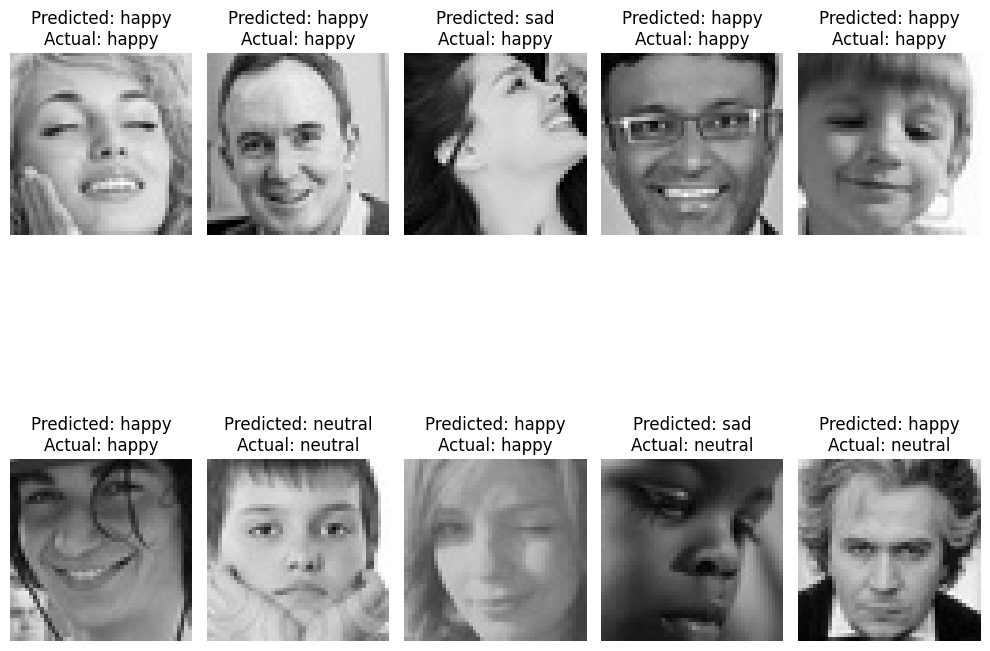

In [ ]:
# check test predictions (model, test loader image number)
show_test_predictions(resnet, test_loader, 10)

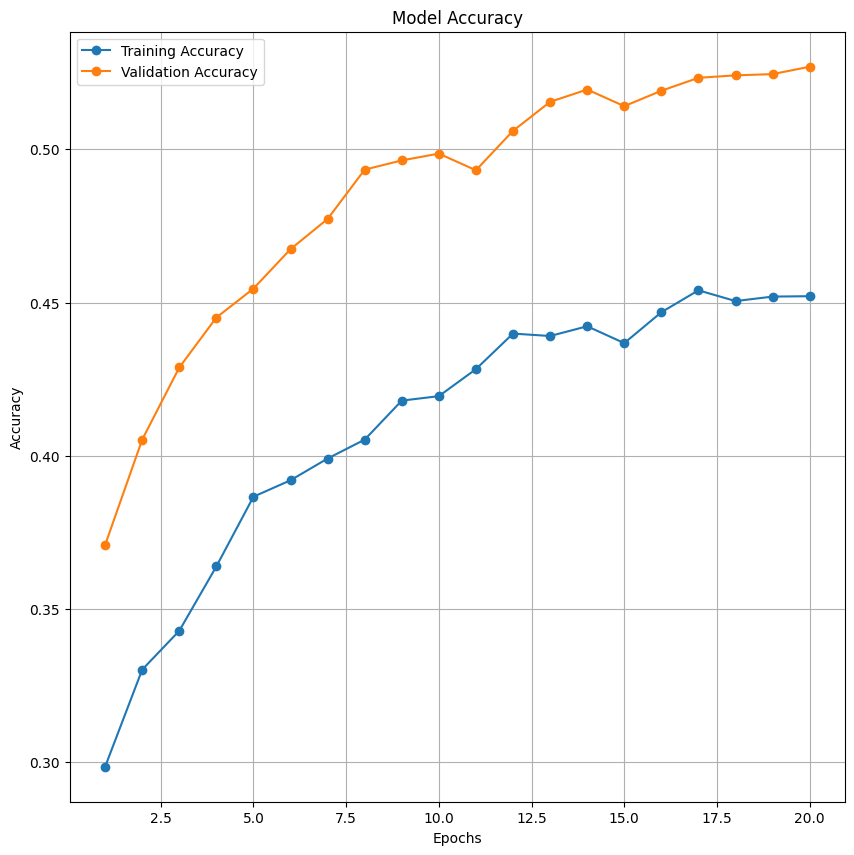

In [ ]:
# plot the train and val accuracy
plot_model_accuracy(resnet_history)

2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 8s/step
Classification Report:
               precision    recall  f1-score   support

       happy       0.50      0.77      0.61        31
     neutral       0.39      0.38      0.38        32
         sad       0.50      0.31      0.38        32
    surprise       0.82      0.72      0.77        32

    accuracy                           0.54       127
   macro avg       0.55      0.55      0.53       127
weighted avg       0.55      0.54      0.53       127



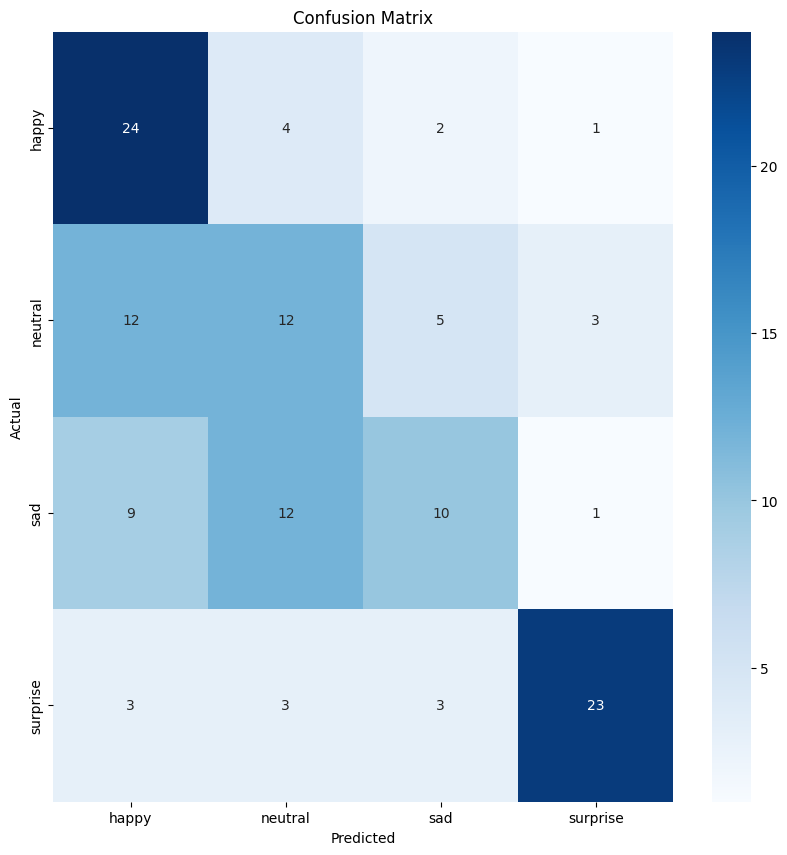

In [ ]:
# print the classification report and confusion matrix
evaluate_model(resnet, test_loader)

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

1. Attempted a few different approaches to this but all landed with similar results. Similar to VGG and underperforming in regards to CNN.
2. Low training and validation accuracy scores that Plateau.
3. Similar to VGG although more complex model, not suited for our problem.

#### EfficentNet Model

In [ ]:
# call helper functions to load data
clear_session()

# modifying data loader to return updated channel for transfer learning cnns
train_loader, val_loader, test_loader, class_indices, input_shape = load_data(64, 'rgb')

Found 15088 images belonging to 4 classes.
Found 4974 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
(48, 48, 3)
Class Labels Mapping: {'happy': 0, 'neutral': 1, 'sad': 2, 'surprise': 3}


In [ ]:
# Load EfficientNetB0
en_base = EfficientNetB0(weights = 'imagenet', include_top = False, input_shape=(48, 48, 3))

# Freeze the convolutional layers
for layer in en_base.layers:
    layer.trainable = False

en_model = Sequential([
    en_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

en_model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 2, 2, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5120)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,621,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,737,703 (25.70 MB)

 Trainable params: 2,688,132 (10.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
for layer in en_model.layers[-10:]:
    layer.trainable = True

# Compile the model
en_model.compile(
    optimizer = Adam(learning_rate = 0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
# Train Model
epochs = 20  # Adjust as needed

# Early Stopping after 5 epochs
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

# Reduce Learning Rate for 3 epochs
lr_scheduler = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, factor = 0.5, min_lr = 1e-6)

# Train the model with these callbacks
en_history = en_model.fit(
    train_loader,
    validation_data=val_loader,
    epochs = epochs,
    callbacks = [early_stopping, lr_scheduler] )

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


236/236 ━━━━━━━━━━━━━━━━━━━━ 63s 181ms/step - accuracy: 0.2610 - loss: 1.4137 - val_accuracy: 0.2288 - val_loss: 1.3791 - learning_rate: 1.0000e-04
Epoch 2/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.2596 - loss: 1.3851 - val_accuracy: 0.3669 - val_loss: 1.3826 - learning_rate: 1.0000e-04
Epoch 3/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 42s 103ms/step - accuracy: 0.2676 - loss: 1.3843 - val_accuracy: 0.3669 - val_loss: 1.3774 - learning_rate: 1.0000e-04
Epoch 4/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.2650 - loss: 1.3829 - val_accuracy: 0.3669 - val_loss: 1.3747 - learning_rate: 1.0000e-04
Epoch 5/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.2450 - loss: 1.3831 - val_accuracy: 0.3669 - val_loss: 1.3730 - learning_rate: 1.0000e-04
Epoch 6/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.2707 - loss: 1.3824 - val_accuracy: 0.3669 - val_loss: 1.3720 - learning_rate: 1.0000e-04
Epoch 7/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accur

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step


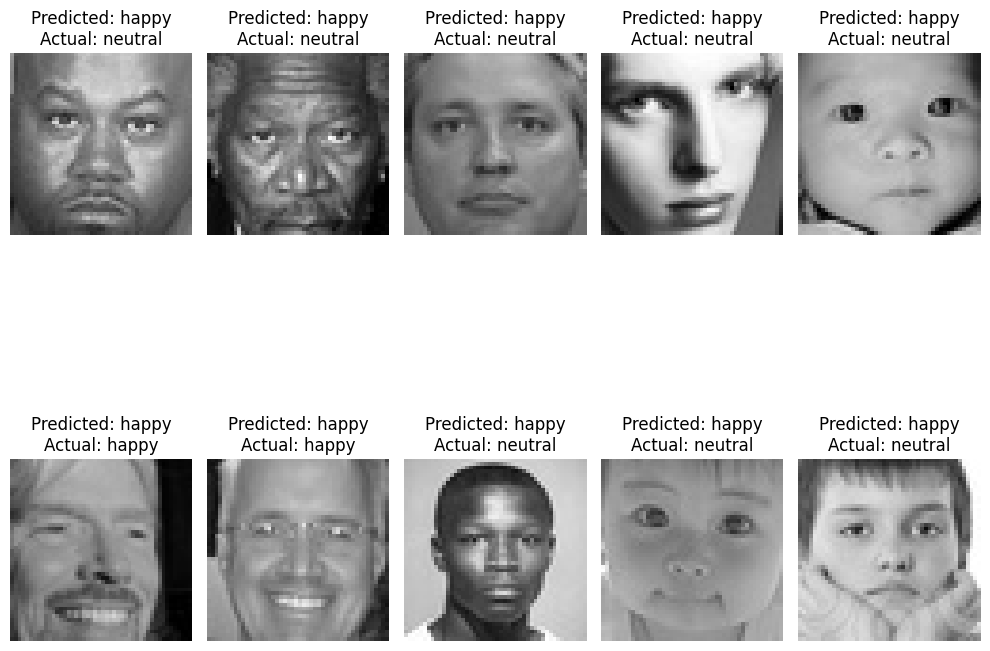

In [ ]:
# check test predictions (model, test loader image number)
show_test_predictions(en_model, test_loader, 10)

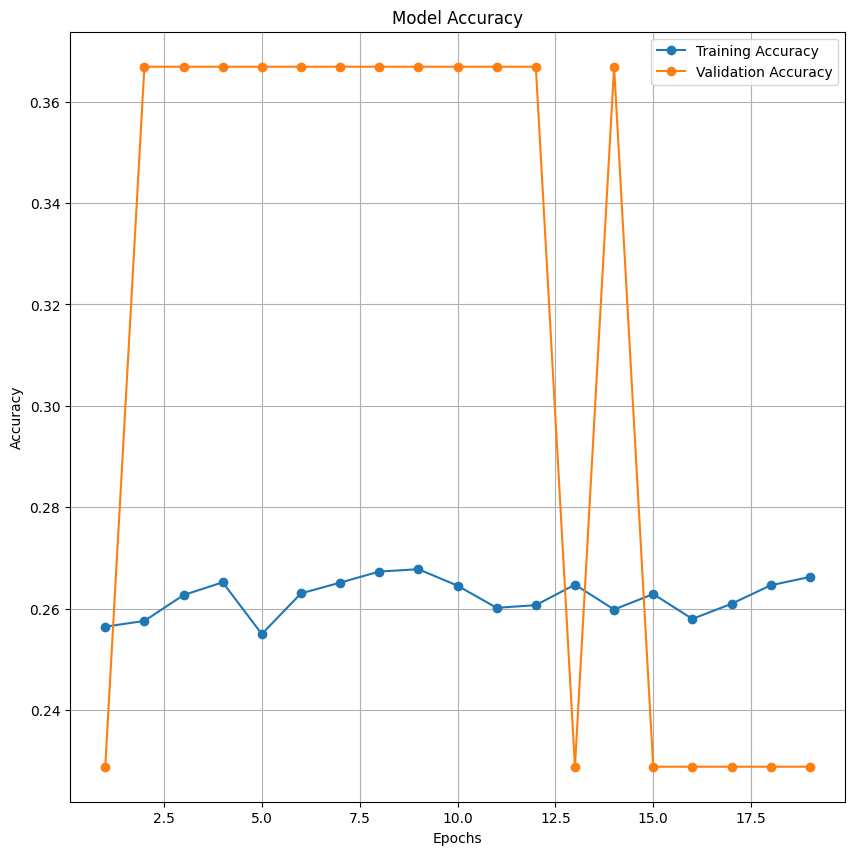

In [ ]:
# plot the train and val accuracy
plot_model_accuracy(en_history)

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 8s/step
Classification Report:
               precision    recall  f1-score   support

       happy       0.24      1.00      0.39        31
     neutral       0.00      0.00      0.00        32
         sad       0.00      0.00      0.00        32
    surprise       0.00      0.00      0.00        32

    accuracy                           0.24       127
   macro avg       0.06      0.25      0.10       127
weighted avg       0.06      0.24      0.10       127



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


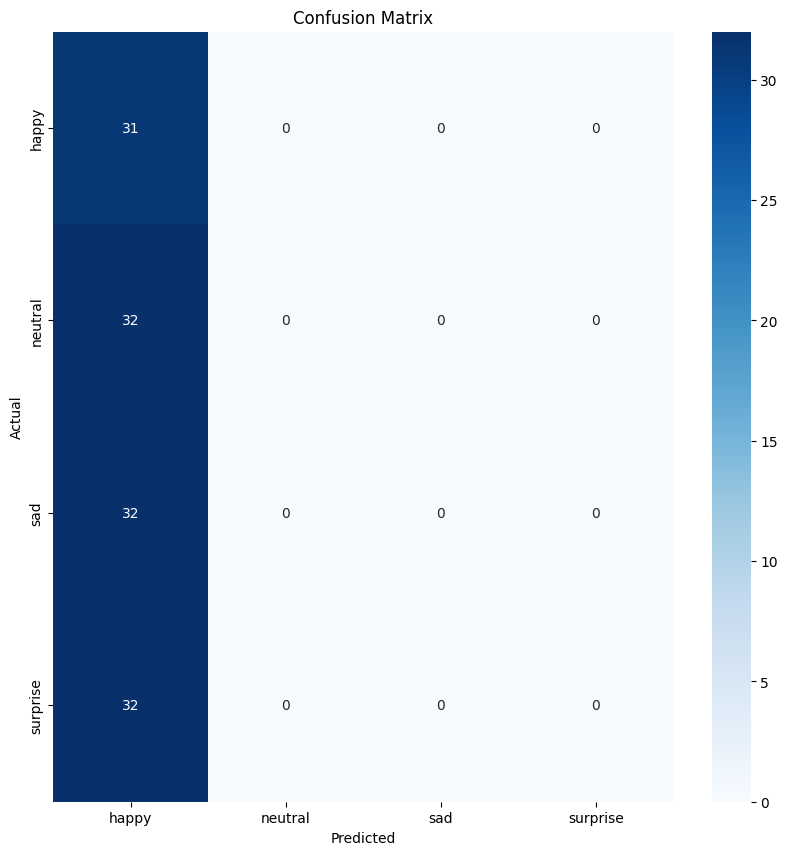

In [ ]:
# print the classification report and confusion matrix
evaluate_model(en_model, test_loader)

**Observations and Insights:__**
1. This model is not a good fit for our problem. The model was unable to classify correctly and our callbacks stopped the model training almost immediately after the 6th epoch.

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?

- The overall performance is lower relative to a customer CNN. We are not satisified with these accuracies and do not recommend using these for classification.
* Do you think our issue lies with 'rgb' color_mode?
RGB plays a role, as these large scale models have been trained a much larger, robust data set with rgb images. But it is not the only factor, also considered are the number of parameters, in comparison to our low res facial images may be too much. As well as training on a diverse set of images and objects with a larger amount of edges/features, leading to complications tryin to predict our images.